In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
airlines = {
    "United Airlines": "UAL", 
    "Ryanair":"RYAAY",
    "IndiGo":"INDIGO.NS",
    "Singapore Airlines": "C6L.SI",
    "ANA Holdings": "9202.T",
    "China Southern Airlines": "600029.SS",
    "Qantas Airways": "QAN.AX",
    "LATAM Airlines":"LTM.SN",
    "Air Arabia": "AIRA.DU"
}

**A dictionary of airlines showing nine different regions**

-United Airlines for North American markets

-RyanAir for Europe

-IndiGo for India

-Singapore Airlines to represent South East Asia and broader Asia-Pacific

-ANA for Japan

-China Southern for China

-LATAM for LATIN America

-AirArabia to represent Middle East 

<Axes: xlabel='Date'>

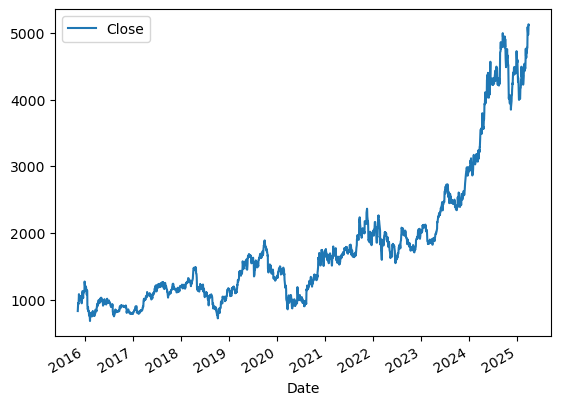

In [14]:
import yfinance as yf

IndiGo = yf.Ticker("INDIGO.NS")
IndiGo = IndiGo.history(period="max")
IndiGo.plot.line(y="Close", use_index=True)

In [6]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


11:22:14 - cmdstanpy - INFO - Chain [1] start processing
11:22:15 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
2677 2026-03-24  6506.449640  5974.669186  7059.488958
2678 2026-03-25  6517.231417  5957.617687  7076.732200
2679 2026-03-26  6531.619238  5983.635117  7080.951865
2680 2026-03-27  6539.429296  5979.249288  7098.077451
2681 2026-03-28  6565.611685  6053.210253  7126.269787


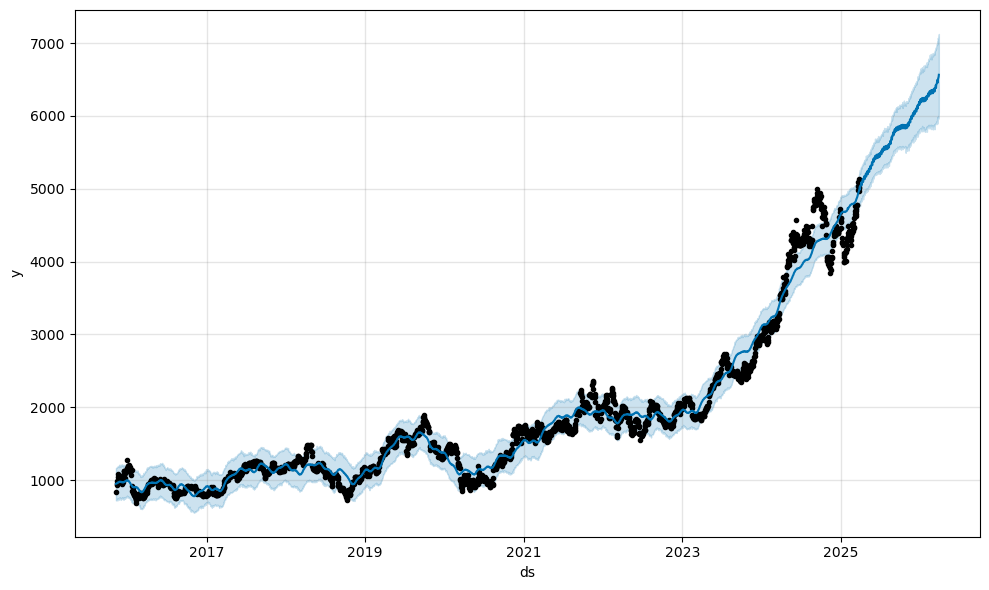

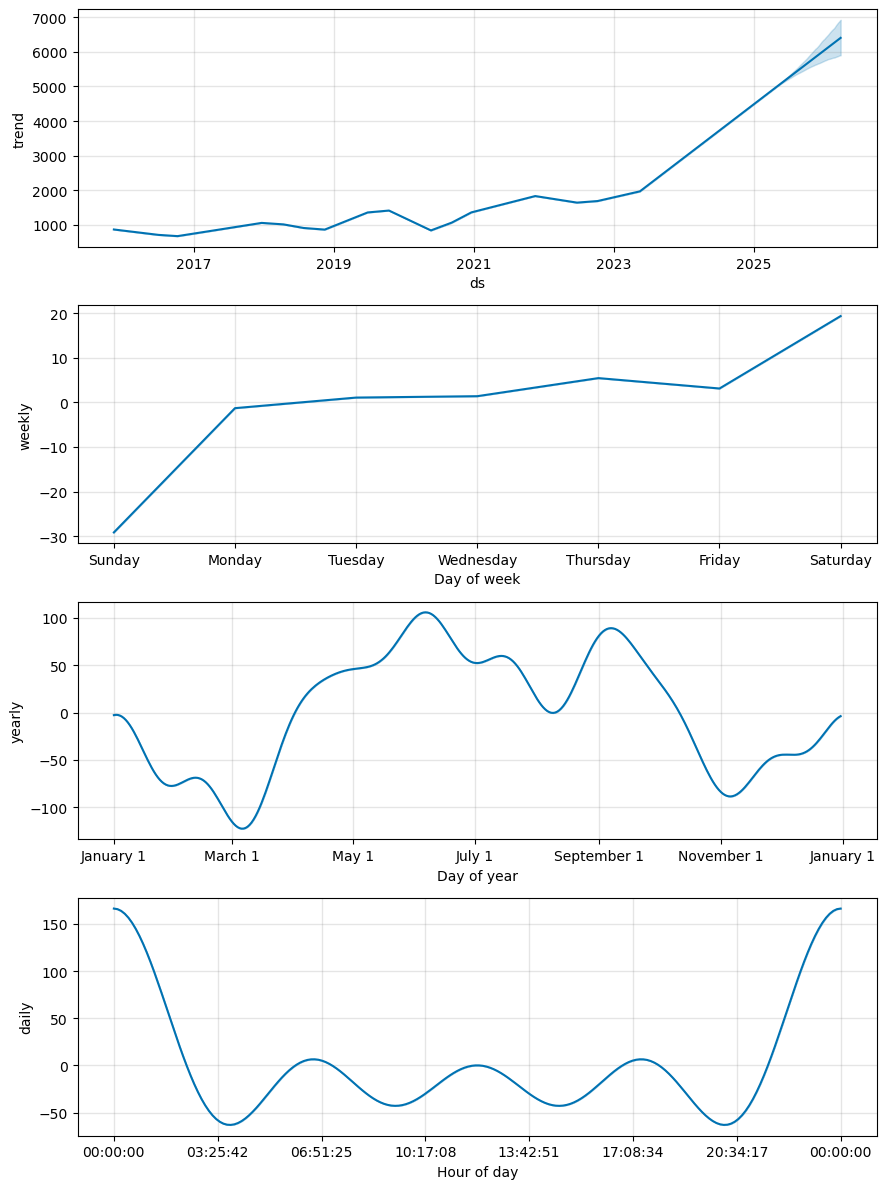

In [16]:

from prophet import Prophet
import pandas as pd
import numpy as np

df=pd.DataFrame({
    'ds':IndiGo.index,
    'y': IndiGo['Close']
})

df['ds']= df['ds'].dt.tz_localize(None)

model= Prophet(daily_seasonality=True)
model.fit(df)

future = model.make_future_dataframe(periods=365) #predicting for next year
forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)

print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

In [36]:
import yfinance as yf
from prophet import Prophet
import pandas as pd

def predict_stock_prices (ticker_symbol, forecast_periods=365):
    #Fetching historical data
    data = yf.Ticker(ticker_symbol)
    history = data.history(period="max")
    df = pd.DataFrame({
    'ds': history.index,
    'y':history['Close']
    })
    df['ds'] = df['ds'].dt.tz_localize(None) #Removing the timezone info
    
    #Creating the Prophet model
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    
    #Future predictions
    future = model.make_future_dataframe(periods=forecast_periods)
    forecast = model.predict(future)

    model.plot(forecast)
    model.plot_components(forecast)
    
    #Printing the forecast details
    print(forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail())
    

Processing United Airlines (UAL)...


12:02:39 - cmdstanpy - INFO - Chain [1] start processing
12:02:41 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
5178 2026-03-27  68.748358   54.285394   82.614341
5179 2026-03-28  68.499755   54.387913   83.147689
5180 2026-03-29  68.492886   54.996975   82.918999
5181 2026-03-30  68.699868   55.151654   83.191016
5182 2026-03-31  68.652954   53.940766   81.894273
Processing Ryanair (RYAAY)...


12:02:45 - cmdstanpy - INFO - Chain [1] start processing
12:02:48 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
7364 2026-03-27  50.633993   45.967872   55.492573
7365 2026-03-28  50.730723   45.937359   55.517056
7366 2026-03-29  50.757633   46.025549   55.125810
7367 2026-03-30  50.717207   45.597577   55.372320
7368 2026-03-31  50.756511   45.887552   55.257339
Processing Singapore Airlines (C6L.SI)...


12:02:51 - cmdstanpy - INFO - Chain [1] start processing
12:02:54 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
6753 2026-03-28  7.098097    6.276978    7.914106
6754 2026-03-29  7.097846    6.304169    7.907557
6755 2026-03-30  7.042165    6.269107    7.854149
6756 2026-03-31  7.044742    6.215911    7.871374
6757 2026-04-01  7.040941    6.239958    7.800205
Processing ANA Holdings (9202.T)...


12:02:57 - cmdstanpy - INFO - Chain [1] start processing
12:03:03 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
6666 2026-03-28  3033.367030  2611.426704  3499.639994
6667 2026-03-29  3030.425031  2569.395347  3486.240835
6668 2026-03-30  3012.844750  2561.358339  3475.099077
6669 2026-03-31  3010.133758  2594.933144  3455.743170
6670 2026-04-01  3005.582139  2548.582218  3440.916101
Processing China Southern Airlines (600029.SS)...


12:03:11 - cmdstanpy - INFO - Chain [1] start processing
12:03:16 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
5671 2026-03-28  6.213455    3.751900    8.622885
5672 2026-03-29  6.224867    3.631739    8.580109
5673 2026-03-30  6.382196    3.603508    8.845592
5674 2026-03-31  6.400733    3.853235    9.098211
5675 2026-04-01  6.409929    3.848111    9.125654
Processing LATAM Airlines (LTM.SN)...


12:03:19 - cmdstanpy - INFO - Chain [1] start processing
12:03:25 - cmdstanpy - INFO - Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
6745 2026-03-27  -99.597837 -200.095626  -11.490933
6746 2026-03-28 -100.198096 -203.893866  -13.491469
6747 2026-03-29 -100.243503 -201.201311  -13.408518
6748 2026-03-30  -99.973367 -195.583612  -16.184663
6749 2026-03-31 -100.333834 -188.451765  -10.131932
Processing Air Arabia (AIRA.DU)...


12:03:28 - cmdstanpy - INFO - Chain [1] start processing
12:03:28 - cmdstanpy - INFO - Chain [1] done processing


            ds       yhat  yhat_lower  yhat_upper
639 2026-03-28  54.469722   27.426160   80.115984
640 2026-03-29  54.503250   27.717772   80.270956
641 2026-03-30  54.679248   26.826920   80.401294
642 2026-03-31  54.705865   27.889577   80.509171
643 2026-04-01  54.835524   26.898276   80.900029


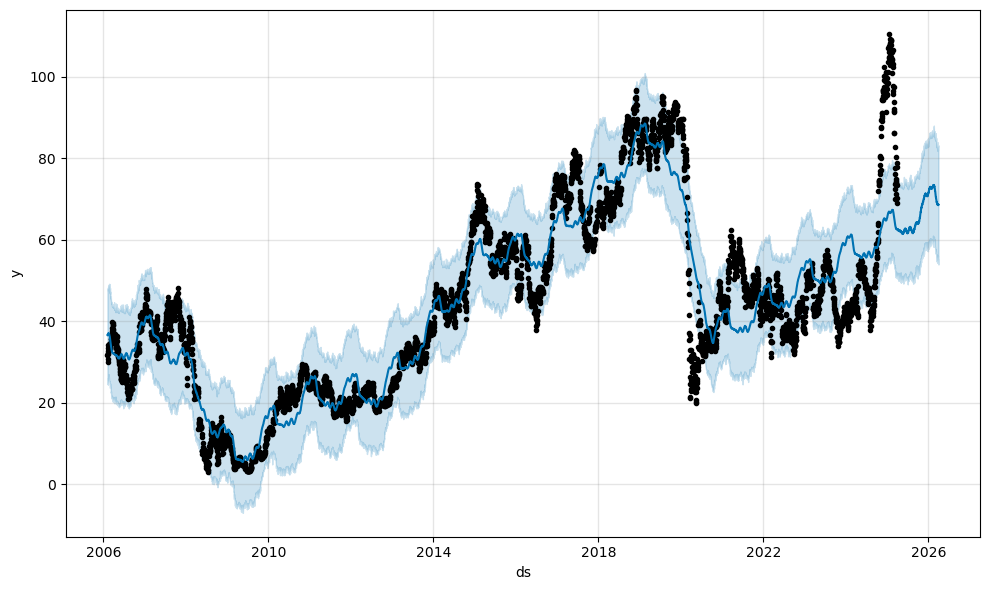

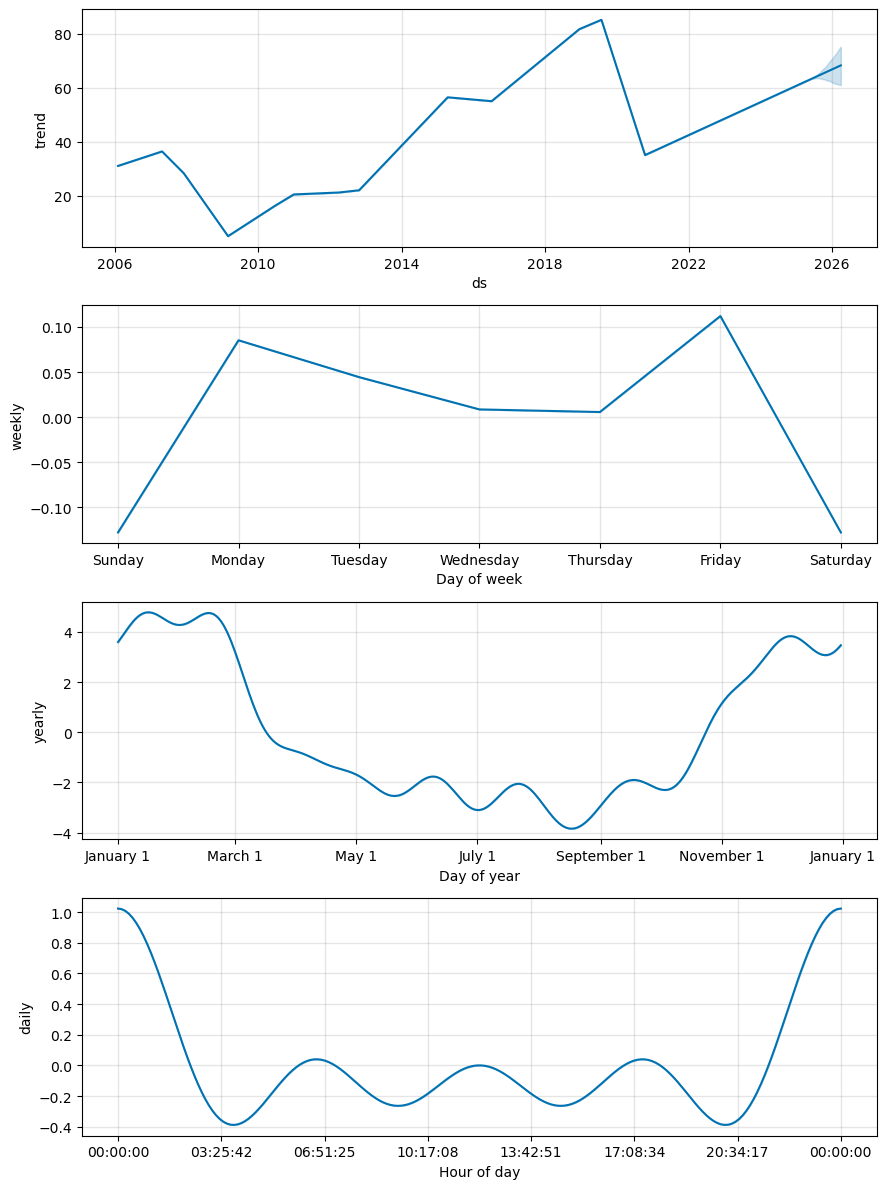

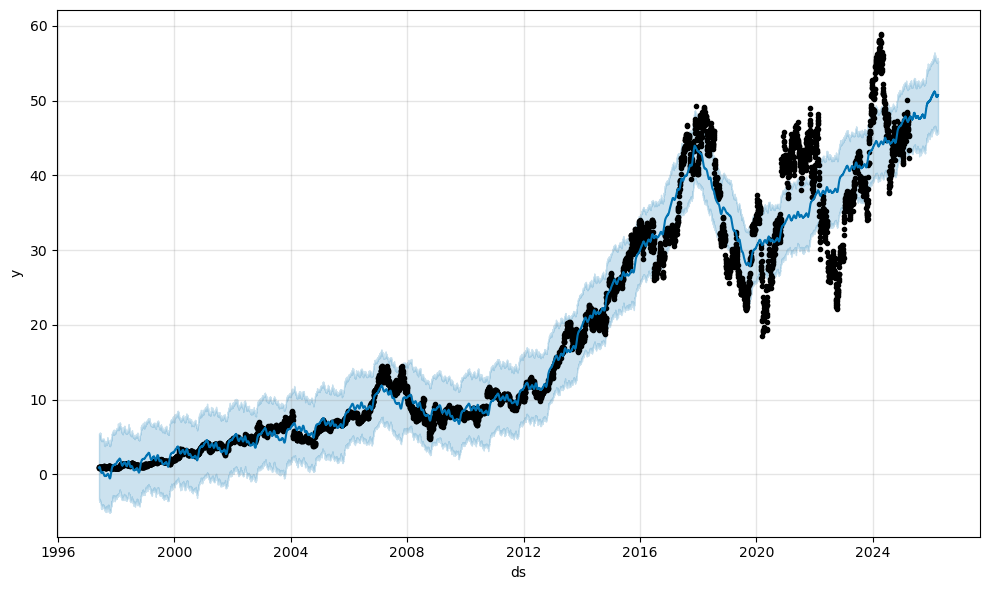

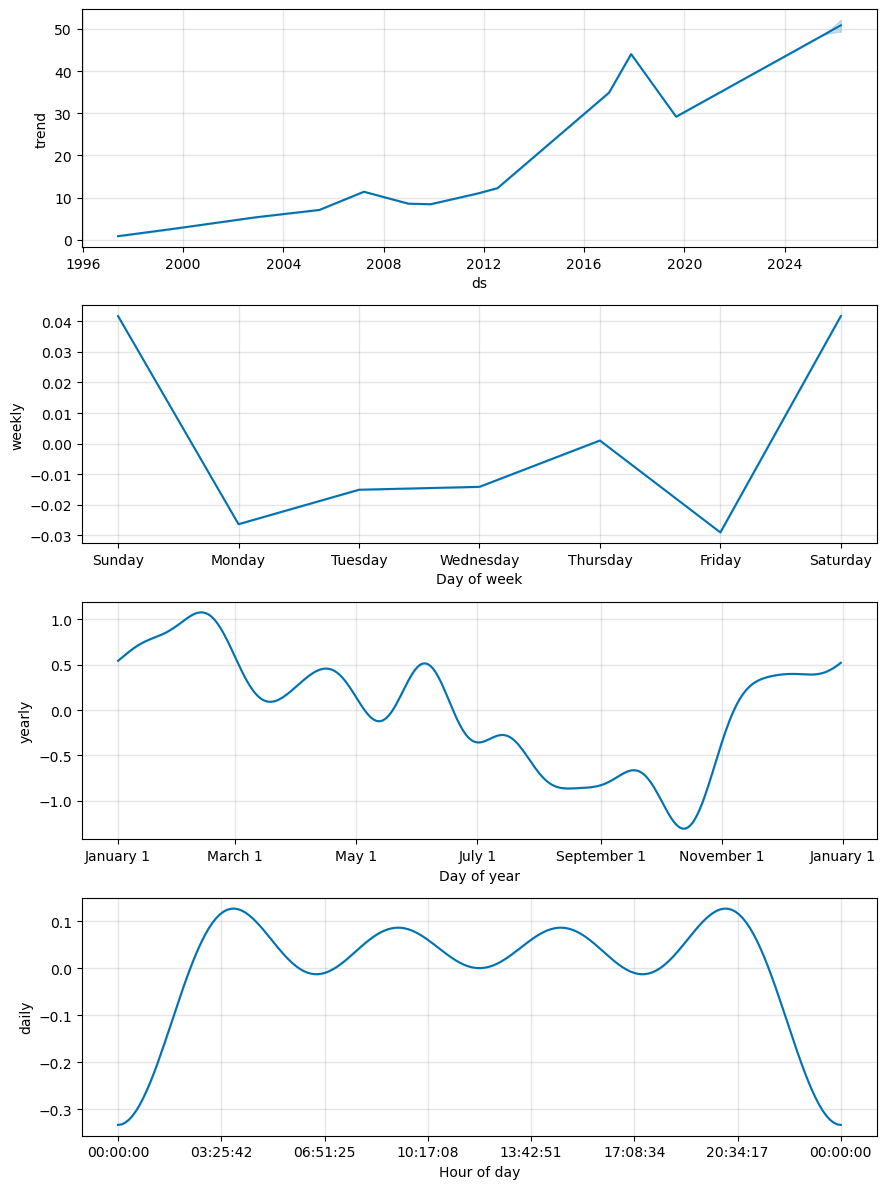

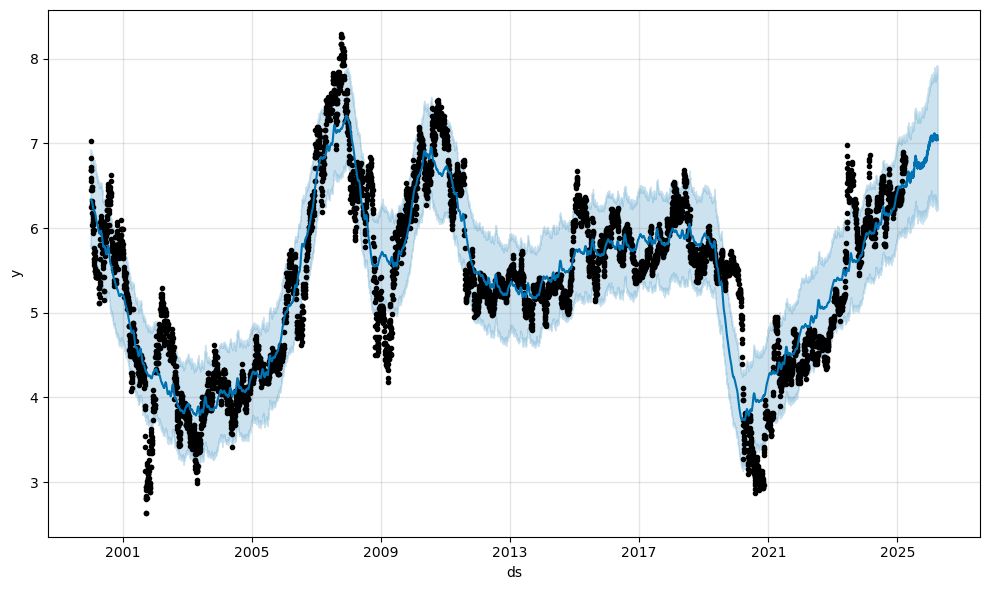

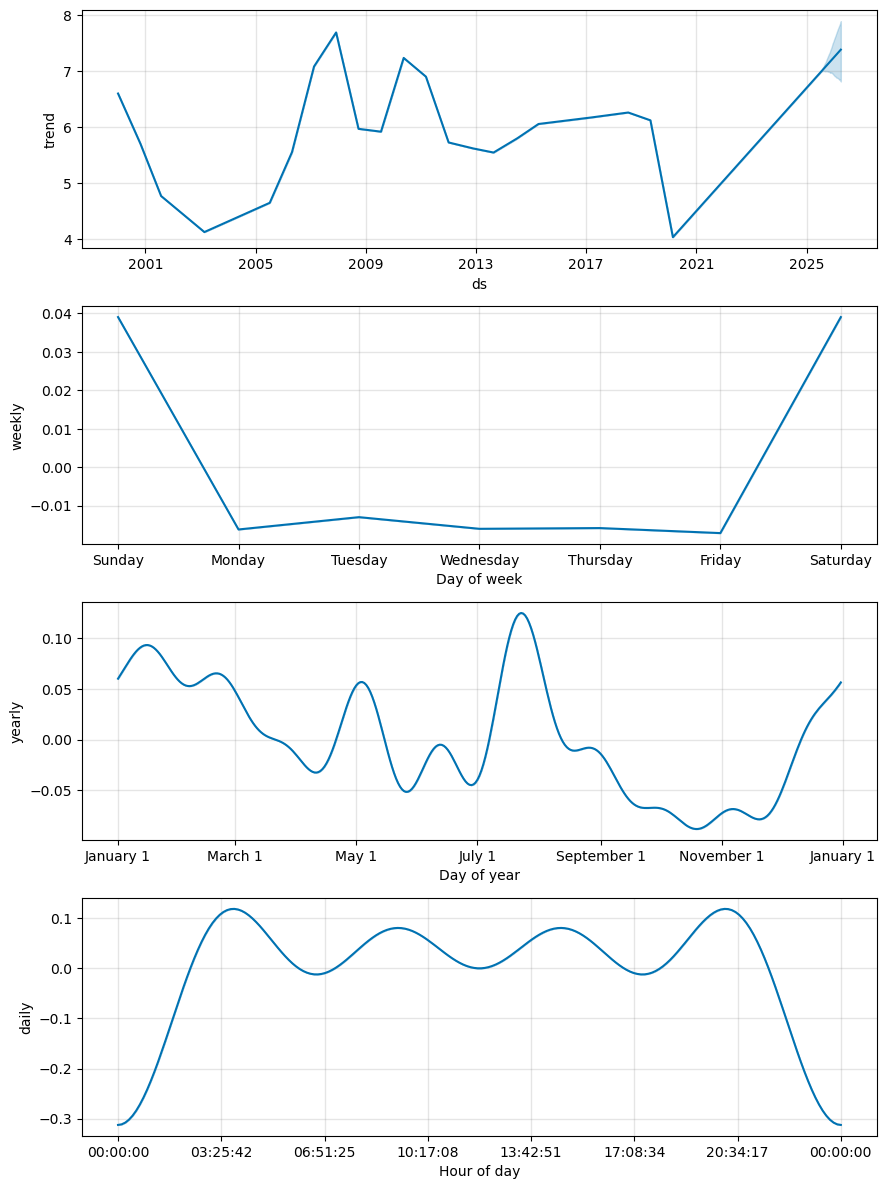

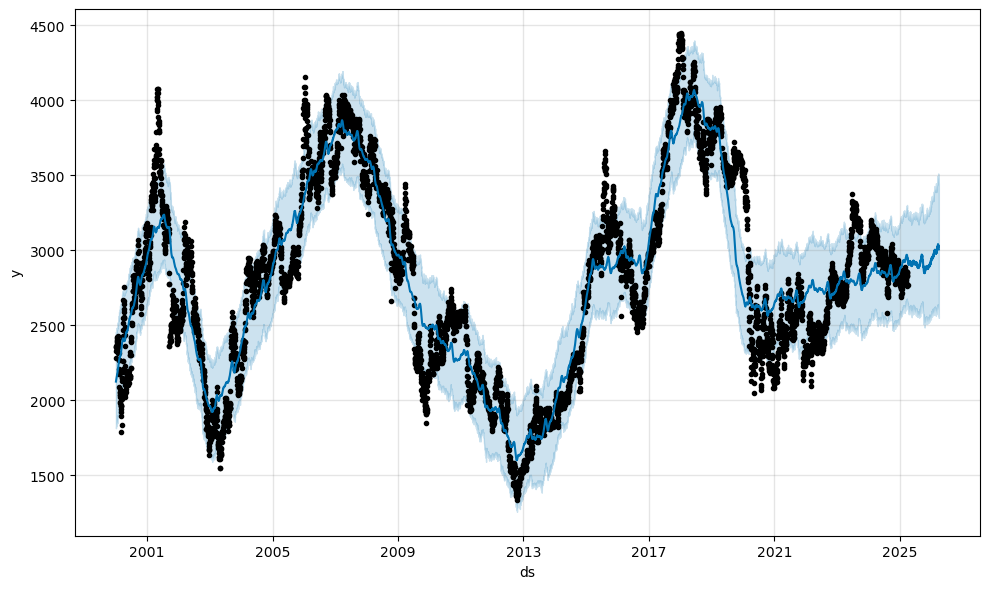

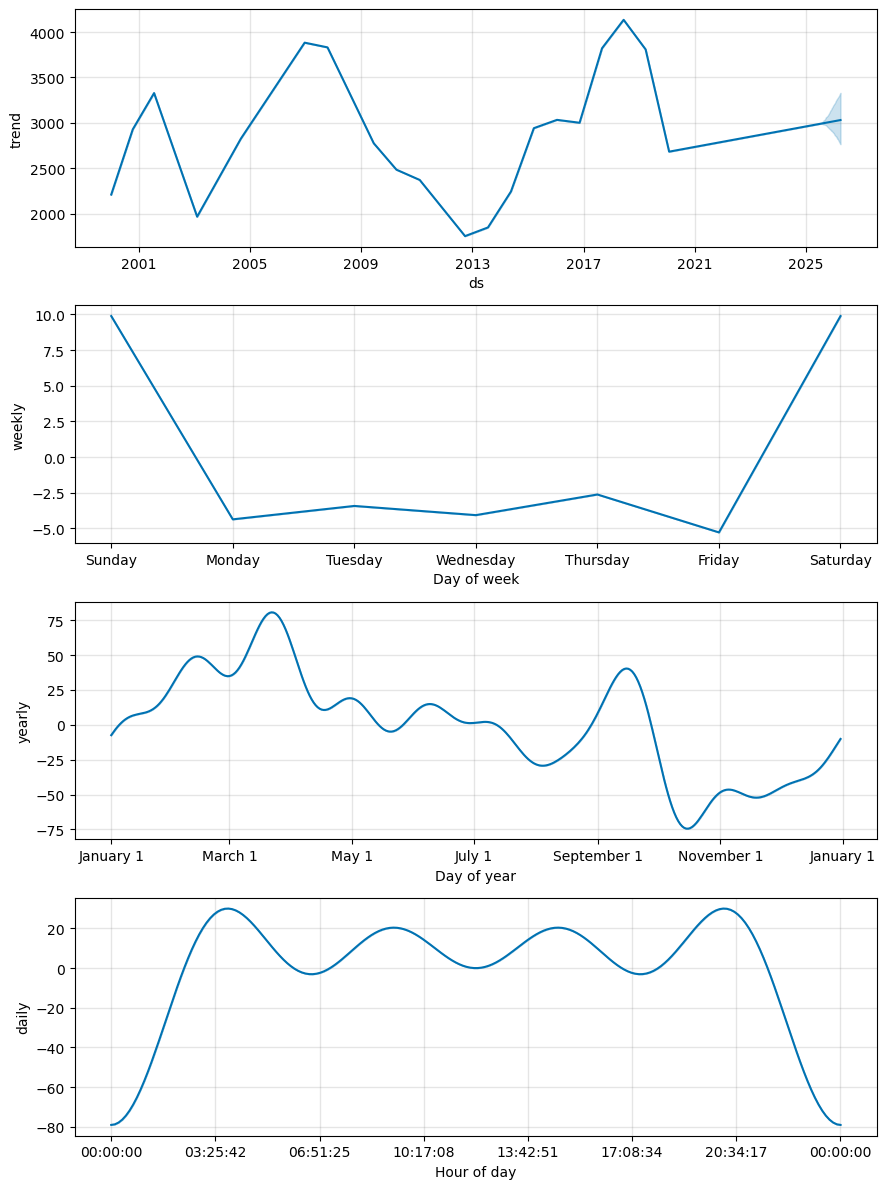

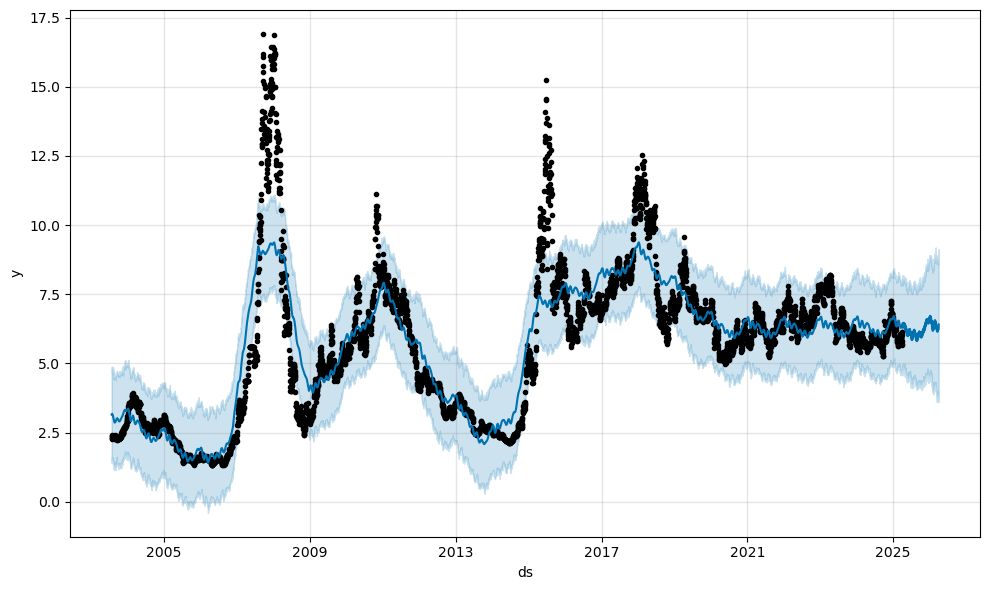

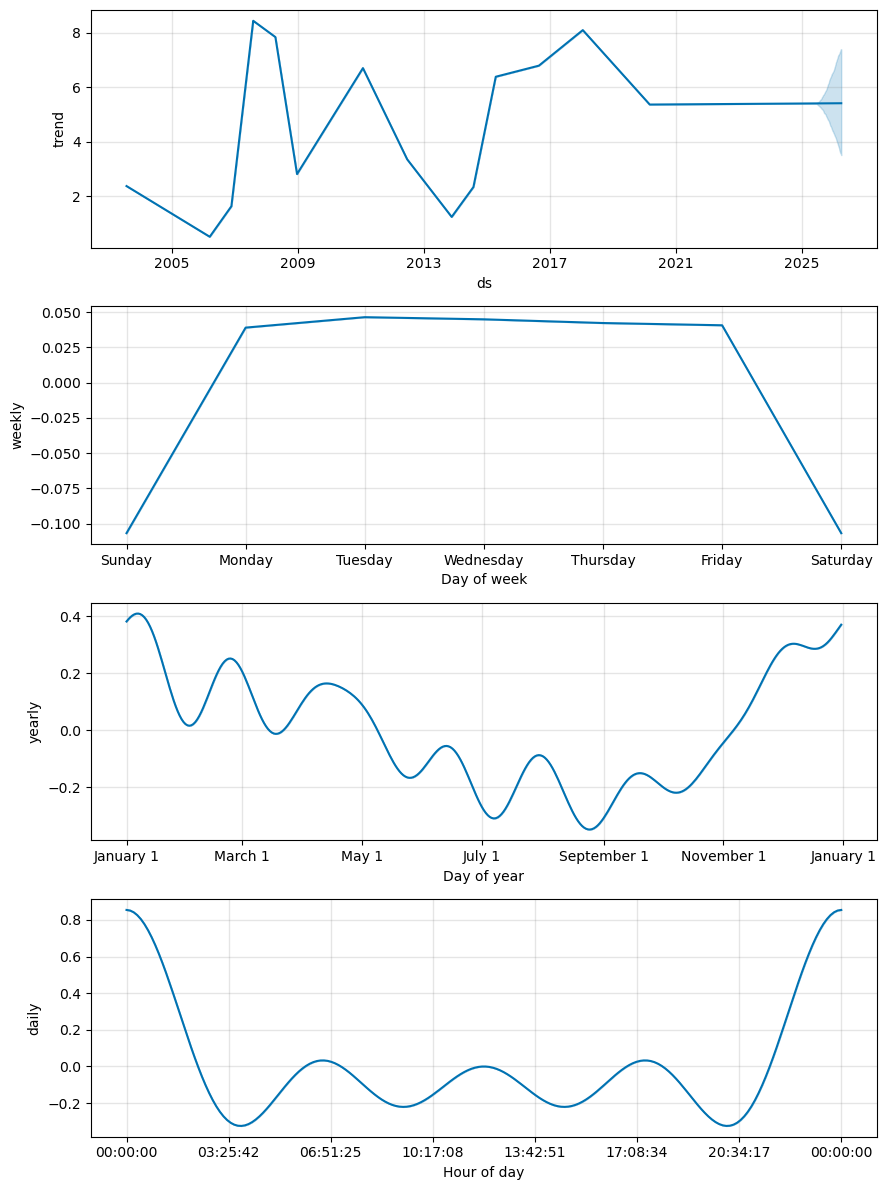

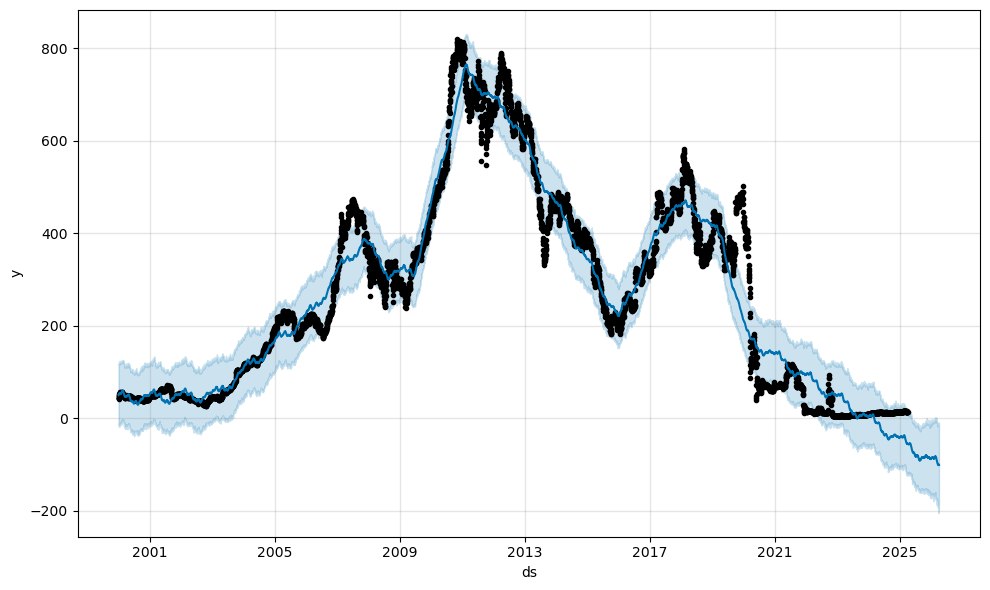

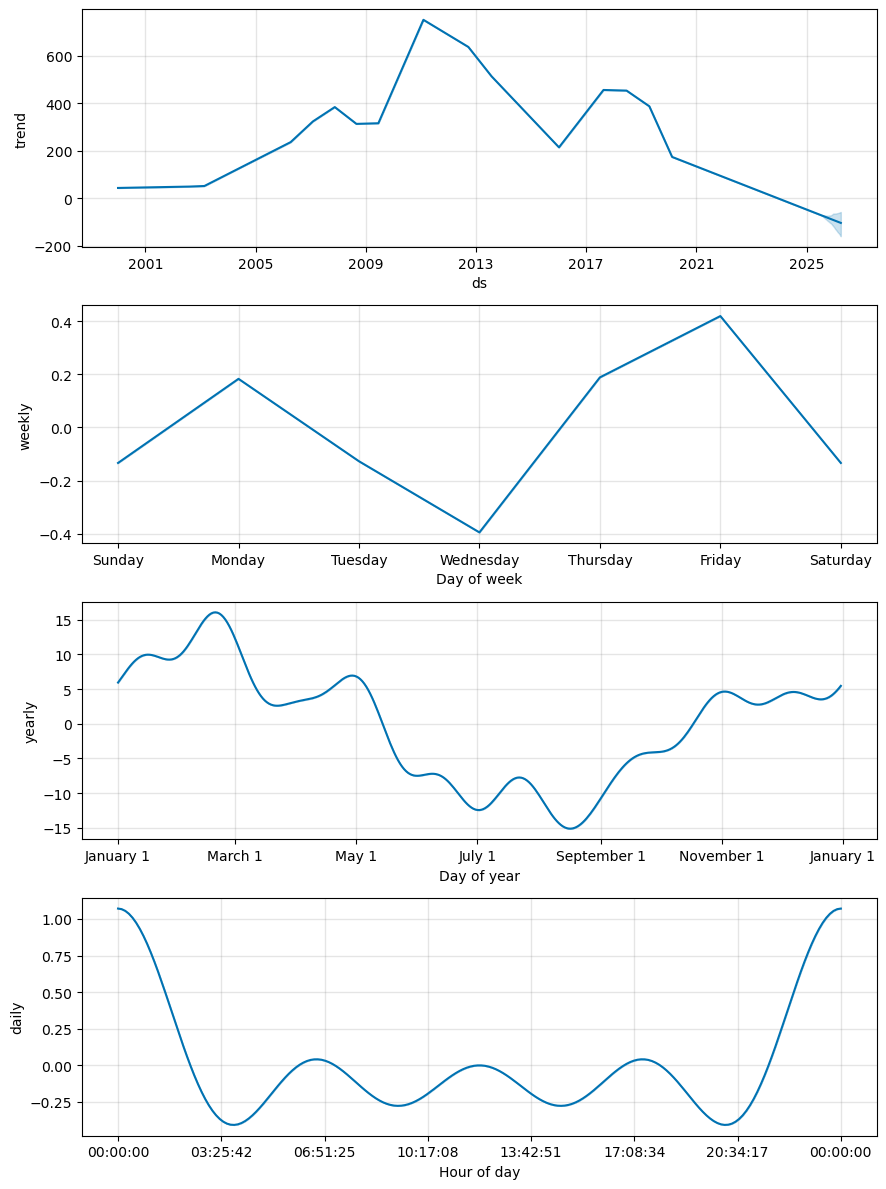

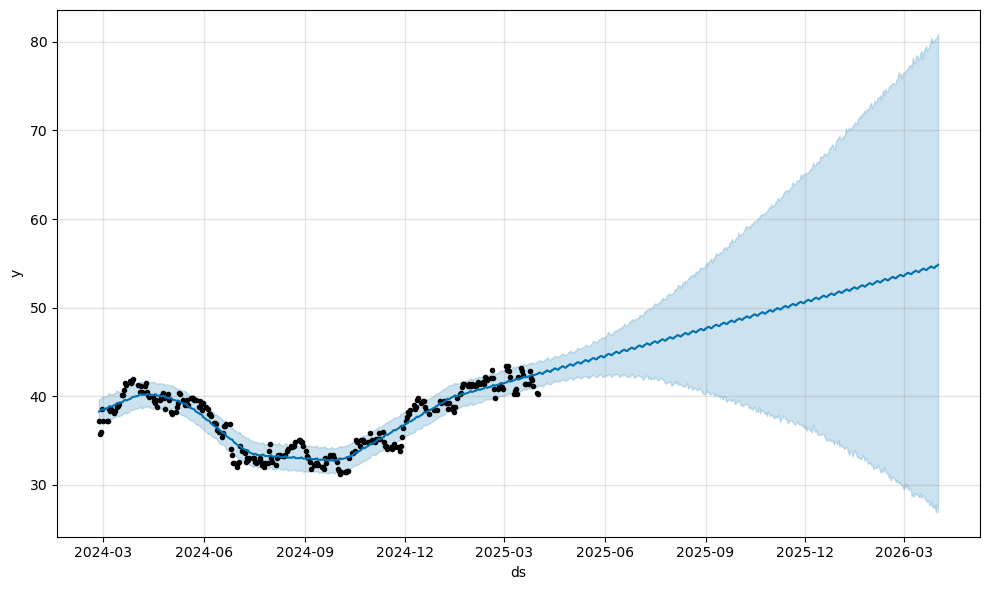

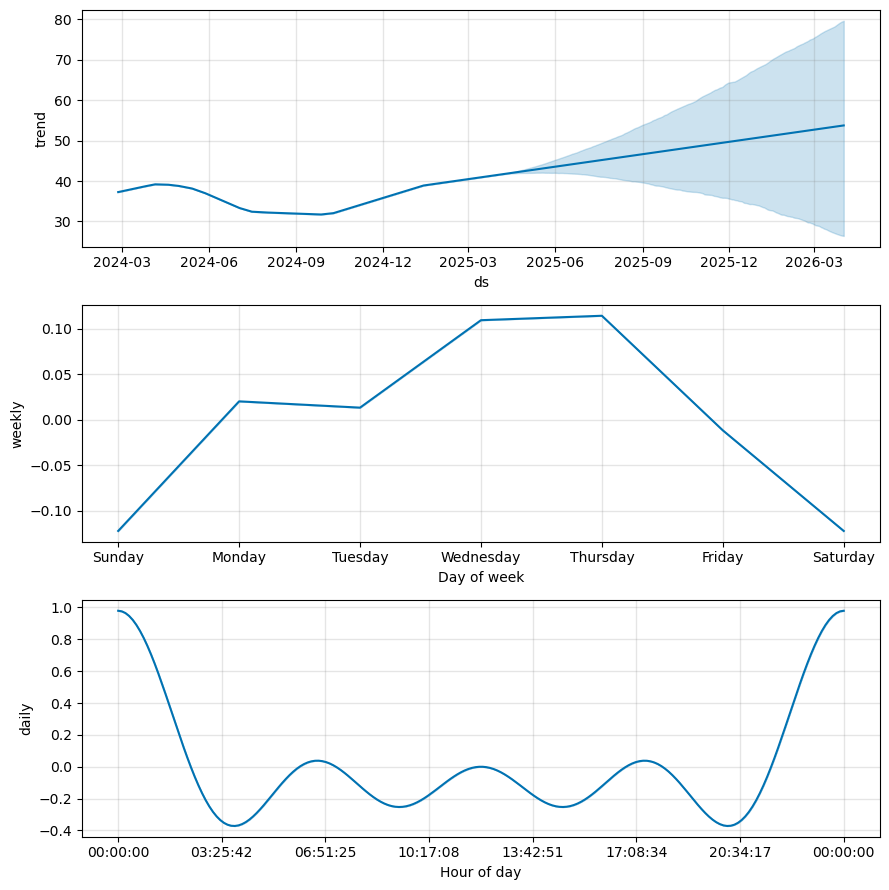

In [38]:
airlines = {
    "United Airlines": "UAL", 
    "Ryanair": "RYAAY",
    "IndiGo": "INDIGO.NS",
    "Singapore Airlines": "C6L.SI",
    "ANA Holdings": "9202.T",
    "China Southern Airlines": "600029.SS",
    "LATAM Airlines": "LTM.SN",
    "Qantas":"QAN.AX",
    "Air Arabia": "AIRA.DU"
}

# Loop through the airlines and analyze each one
for airline, ticker in airlines.items():
    print(f"Processing {airline} ({ticker})...")
    predict_stock_prices(ticker)

15:01:20 - cmdstanpy - INFO - Chain [1] start processing
15:01:22 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
5178 2026-03-27  68.748358   55.079940   83.017594
5179 2026-03-28  68.499755   54.899934   82.911974
5180 2026-03-29  68.492886   54.745314   84.538425
5181 2026-03-30  68.699868   54.904390   83.260860
5182 2026-03-31  68.652954   55.257640   82.827279


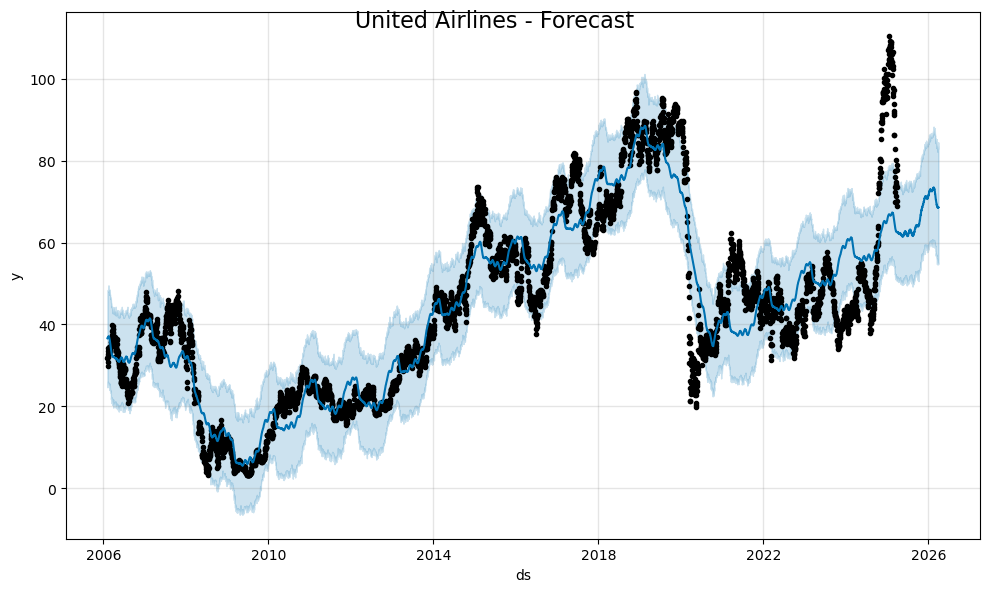

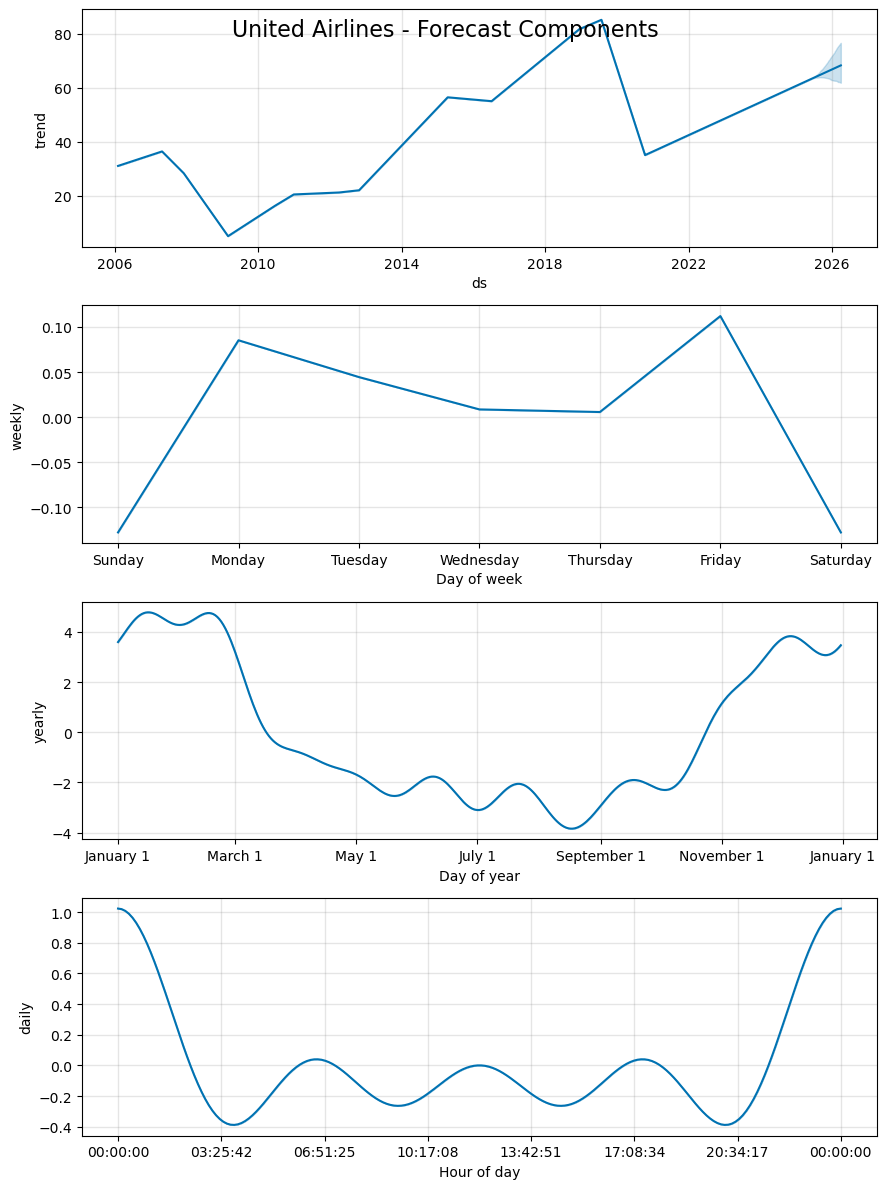

In [44]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

def predict_stock_prices(ticker_symbol, airline_name, forecast_periods=365):
    # Fetching historical data
    data = yf.Ticker(ticker_symbol)
    history = data.history(period="max")
    
    # Preparing the data for Prophet
    df = pd.DataFrame({
        'ds': history.index,
        'y': history['Close']
    })
    df['ds'] = df['ds'].dt.tz_localize(None)  # Removing timezone info
    
    # Creating the Prophet model
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    
    # Future predictions
    future = model.make_future_dataframe(periods=forecast_periods)
    forecast = model.predict(future)
    
    # Plotting the forecast with the airline name as the title
    fig_forecast = model.plot(forecast)
    fig_forecast.suptitle(f"{airline_name} - Forecast", fontsize=16)
    
    # Plotting the components with the airline name as the title
    fig_components = model.plot_components(forecast)
    fig_components.suptitle(f"{airline_name} - Forecast Components", fontsize=16)
    
    # Printing the forecast details
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Example of usage
predict_stock_prices("UAL", "United Airlines")


15:02:14 - cmdstanpy - INFO - Chain [1] start processing
15:02:16 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
7364 2026-03-27  50.507930   46.026855   55.467842
7365 2026-03-28  50.615054   45.975922   55.242397
7366 2026-03-29  50.641584   46.099906   55.774401
7367 2026-03-30  50.589000   46.161137   55.437116
7368 2026-03-31  50.627860   46.215609   55.454706


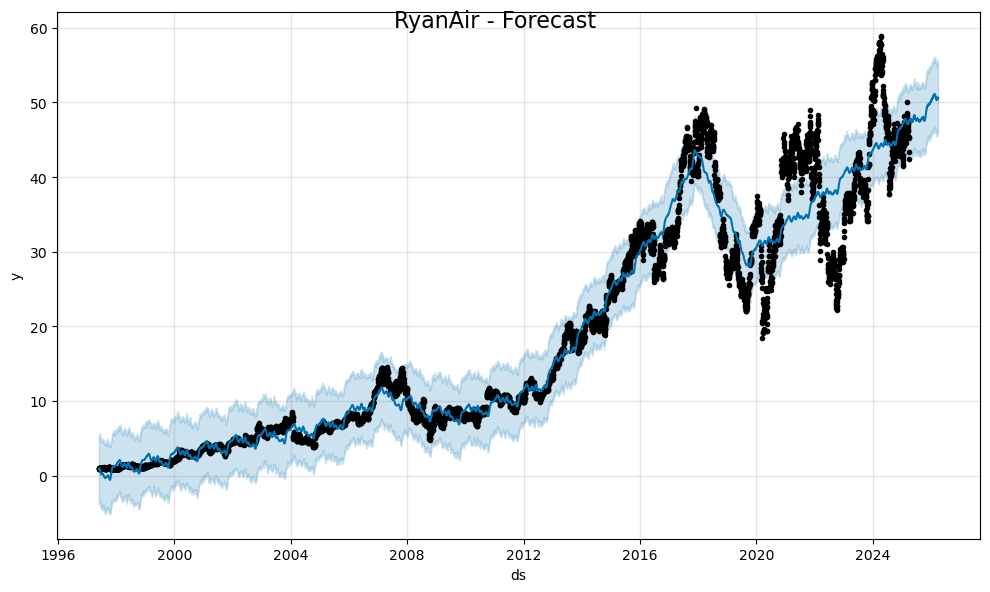

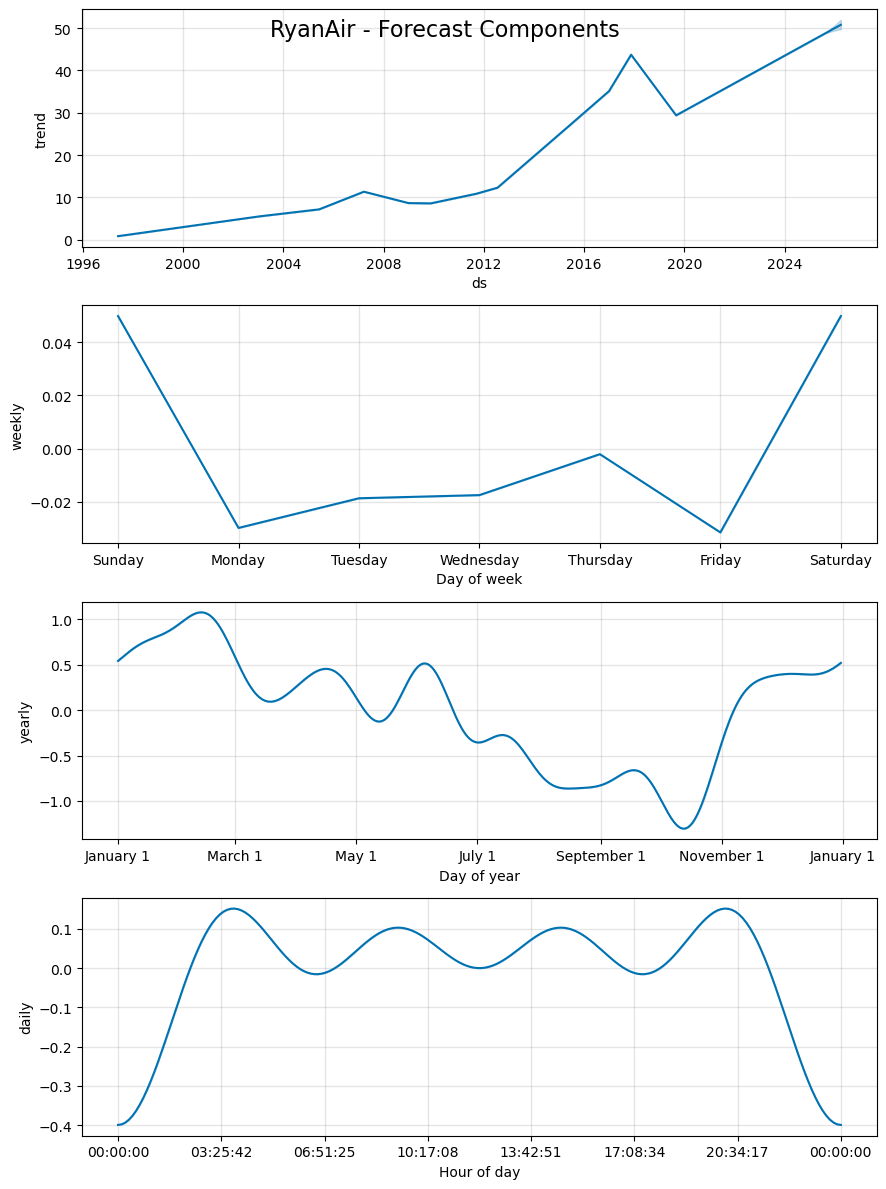

In [46]:
predict_stock_prices("RYAAY", "RyanAir")

15:03:07 - cmdstanpy - INFO - Chain [1] start processing
15:03:10 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
6753 2026-03-28  7.088166    6.293322    7.956225
6754 2026-03-29  7.087919    6.271998    7.955884
6755 2026-03-30  7.031121    6.119366    7.869812
6756 2026-03-31  7.033599    6.122887    7.913838
6757 2026-04-01  7.029756    6.176864    7.914462


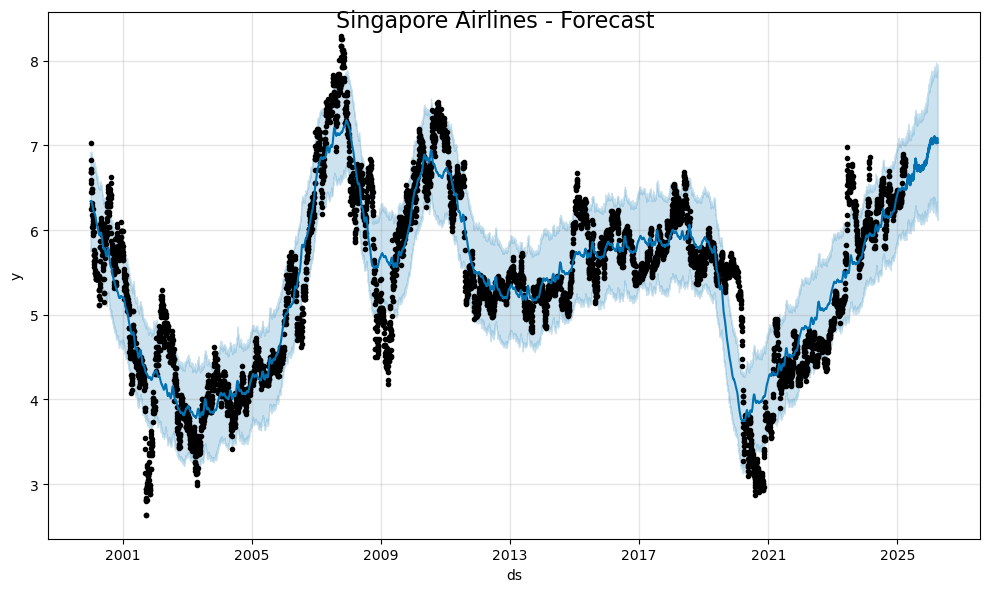

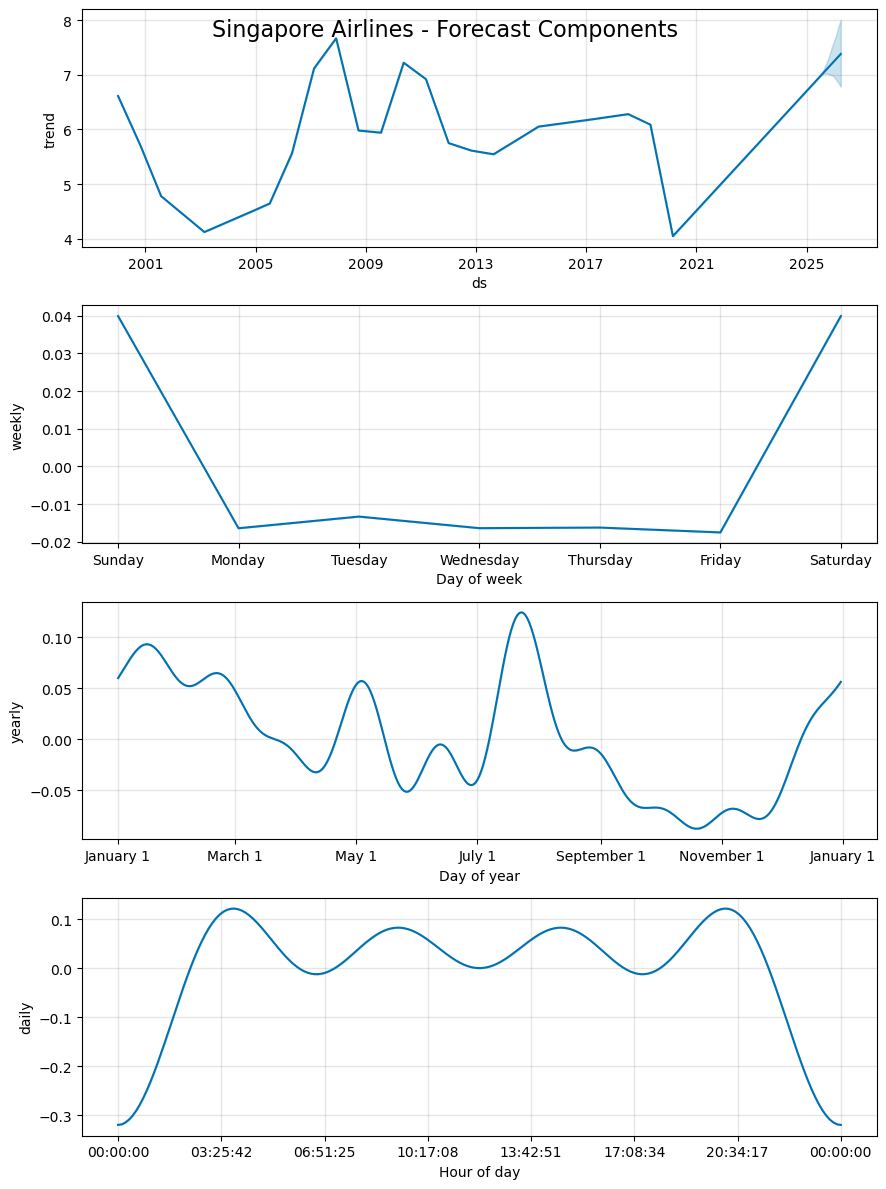

In [48]:
predict_stock_prices("C6L.SI","Singapore Airlines")

15:04:22 - cmdstanpy - INFO - Chain [1] start processing
15:04:22 - cmdstanpy - INFO - Chain [1] done processing


            ds       yhat  yhat_lower  yhat_upper
639 2026-03-28  54.977832   30.989852   78.954344
640 2026-03-29  55.012630   31.120320   78.750628
641 2026-03-30  55.194978   31.192948   79.230751
642 2026-03-31  55.225054   30.846940   79.404689
643 2026-04-01  55.353376   31.171062   79.321791


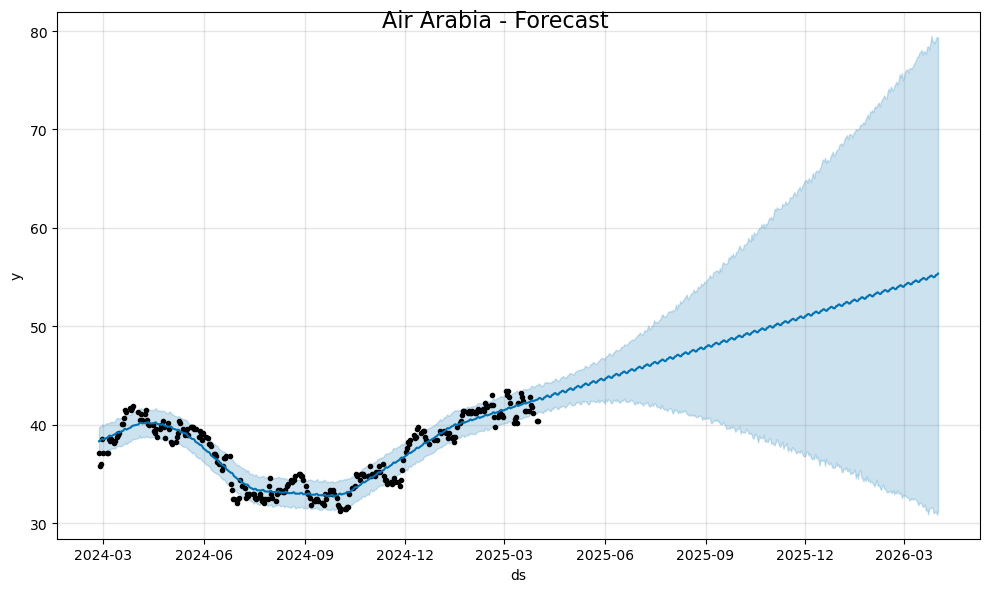

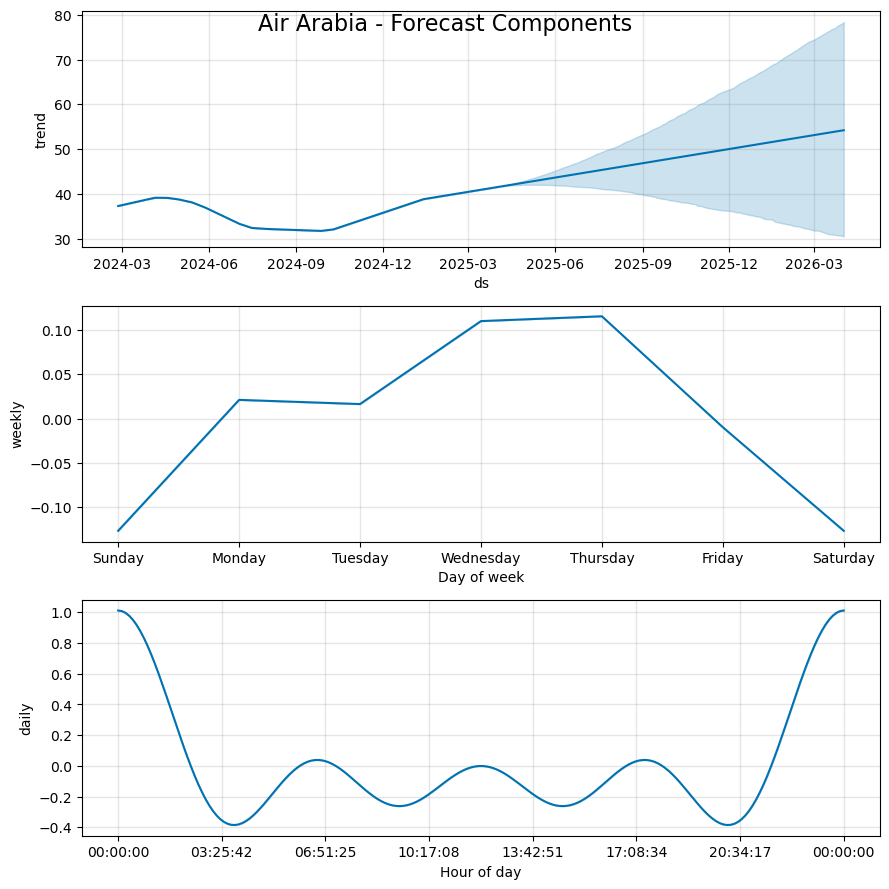

In [50]:
predict_stock_prices("AIRA.DU","Air Arabia")

15:05:29 - cmdstanpy - INFO - Chain [1] start processing
15:05:33 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
7939 2026-03-28  6.896898    6.111945    7.760028
7940 2026-03-29  6.895457    6.099366    7.747626
7941 2026-03-30  6.875942    6.070716    7.694891
7942 2026-03-31  6.875057    6.098961    7.721045
7943 2026-04-01  6.869399    6.113472    7.673614


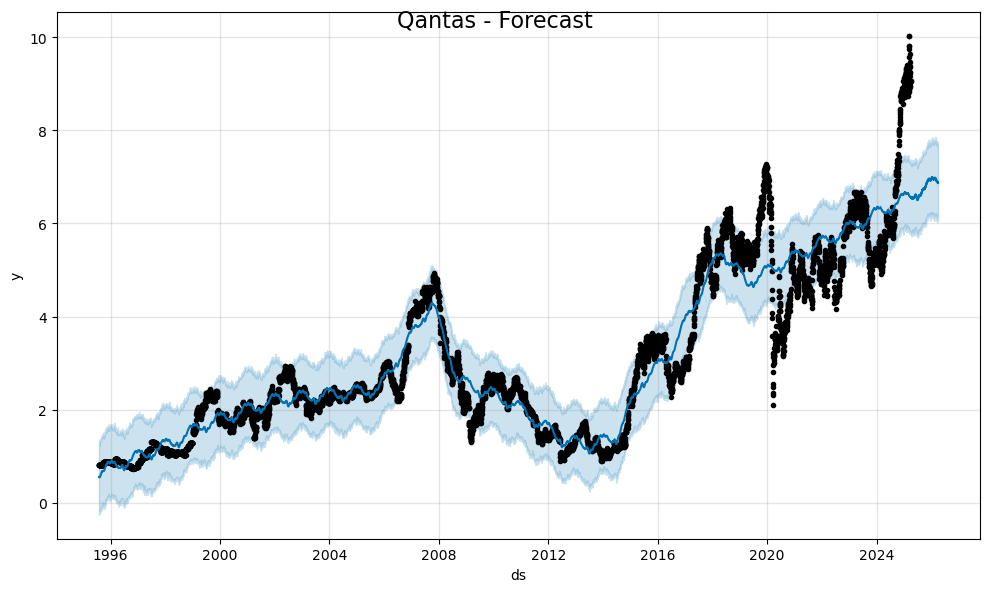

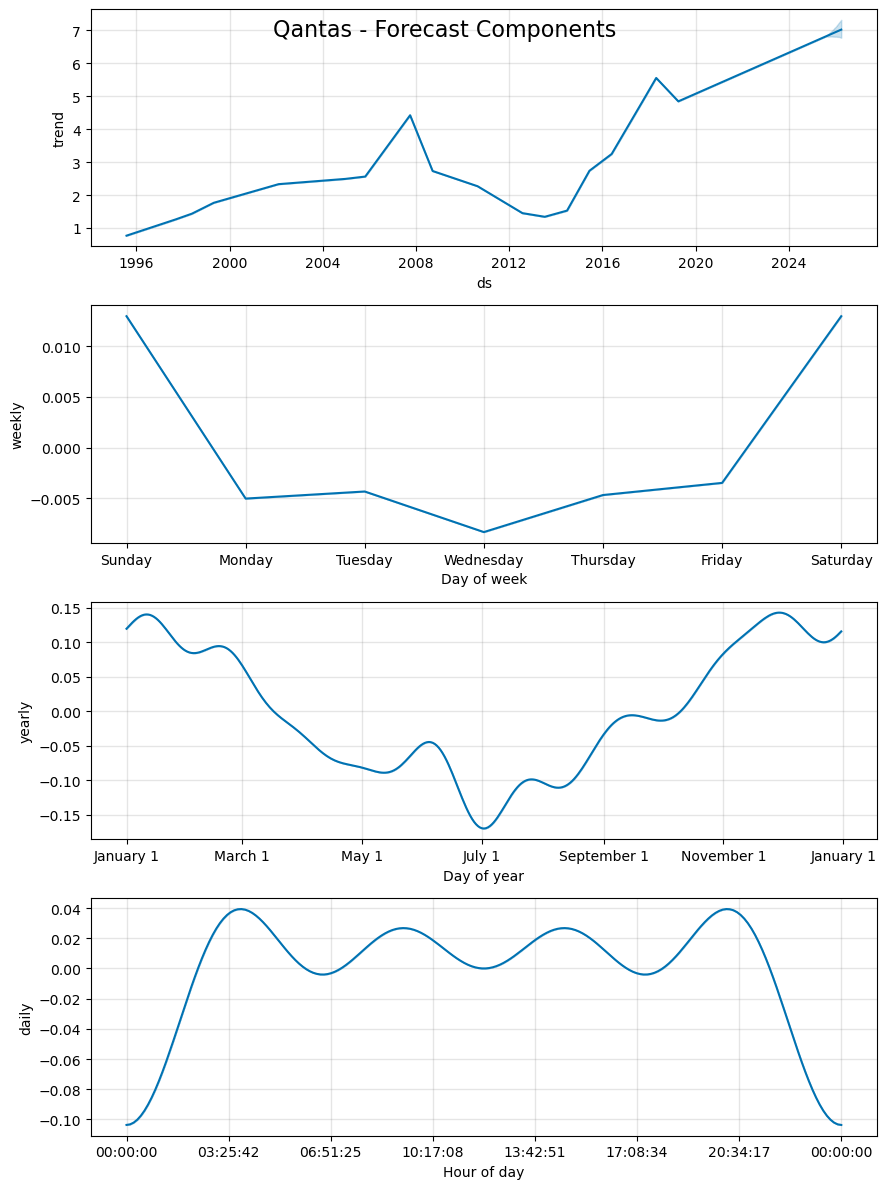

In [52]:
predict_stock_prices("QAN.AX", "Qantas")

Processing Ryanair (RYAAY)...


12:14:50 - cmdstanpy - INFO - Chain [1] start processing
12:14:54 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
7364 2026-03-27  50.550405   45.820423   55.443984
7365 2026-03-28  50.651792   45.888172   55.582626
7366 2026-03-29  50.678432   45.950529   55.725775
7367 2026-03-30  50.631646   45.948090   55.577379
7368 2026-03-31  50.670958   46.029706   55.159472
Finished processing Ryanair.
Processing Qantas (QAN.AX)...


12:14:56 - cmdstanpy - INFO - Chain [1] start processing
12:15:02 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
7939 2026-03-28  6.889791    6.021175    7.671175
7940 2026-03-29  6.888320    6.082132    7.688100
7941 2026-03-30  6.867331    5.995502    7.678573
7942 2026-03-31  6.866495    5.981412    7.672246
7943 2026-04-01  6.860795    5.933804    7.699915
Finished processing Qantas.
Processing Singapore Airlines (C6L.SI)...


12:15:05 - cmdstanpy - INFO - Chain [1] start processing
12:15:10 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
6753 2026-03-28  7.090816    6.279420    7.930257
6754 2026-03-29  7.090557    6.307442    7.895942
6755 2026-03-30  7.036398    6.207194    7.819966
6756 2026-03-31  7.038950    6.204939    7.872466
6757 2026-04-01  7.035077    6.190832    7.748382
Finished processing Singapore Airlines.
Processing ANA Holdings (9202.T)...


12:15:14 - cmdstanpy - INFO - Chain [1] start processing
12:15:22 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
6666 2026-03-28  3031.049751  2563.922807  3508.310617
6667 2026-03-29  3028.109378  2555.253131  3518.323515
6668 2026-03-30  3011.108930  2536.943004  3489.632780
6669 2026-03-31  3008.443499  2552.260060  3479.310588
6670 2026-04-01  3003.805111  2498.817433  3467.084678
Finished processing ANA Holdings.
Processing China Southern Airlines (600029.SS)...


12:15:26 - cmdstanpy - INFO - Chain [1] start processing
12:15:32 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
5671 2026-03-28  6.193812    3.330635    8.560015
5672 2026-03-29  6.205178    3.611277    8.601799
5673 2026-03-30  6.356797    3.864013    8.651173
5674 2026-03-31  6.375222    3.635569    8.641670
5675 2026-04-01  6.384460    3.558554    8.655985
Finished processing China Southern Airlines.
Processing LATAM Airlines (LTM.SN)...


12:15:35 - cmdstanpy - INFO - Chain [1] start processing
12:15:42 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
6745 2026-03-27 -98.834570 -181.987156   -9.186209
6746 2026-03-28 -99.452793 -180.917940  -10.267491
6747 2026-03-29 -99.497229 -187.478976  -14.305321
6748 2026-03-30 -99.201938 -191.481952   -7.837894
6749 2026-03-31 -99.560900 -189.875476   -8.128270
Finished processing LATAM Airlines.
Processing Air Arabia (AIRA.DU)...


12:15:45 - cmdstanpy - INFO - Chain [1] start processing
12:15:45 - cmdstanpy - INFO - Chain [1] done processing


            ds       yhat  yhat_lower  yhat_upper
639 2026-03-28  54.469722   30.132616   79.980480
640 2026-03-29  54.503250   29.842391   80.764328
641 2026-03-30  54.679248   29.867972   80.934281
642 2026-03-31  54.705865   30.047738   81.262674
643 2026-04-01  54.835524   30.423071   81.350630
Finished processing Air Arabia.


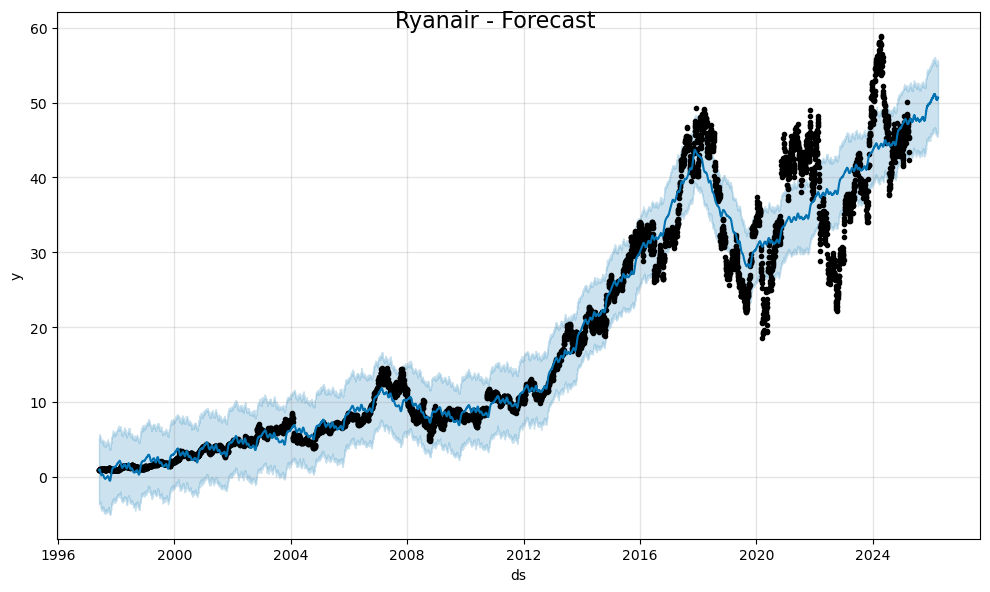

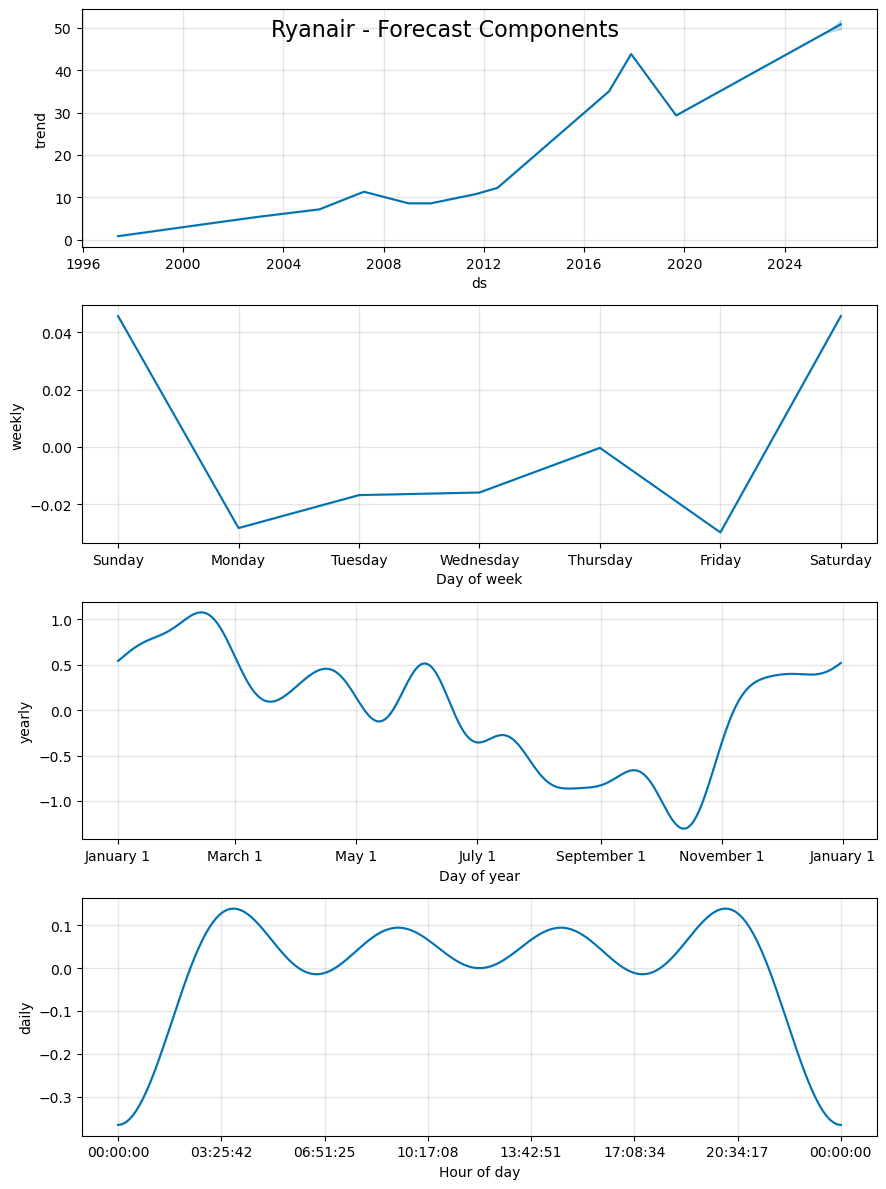

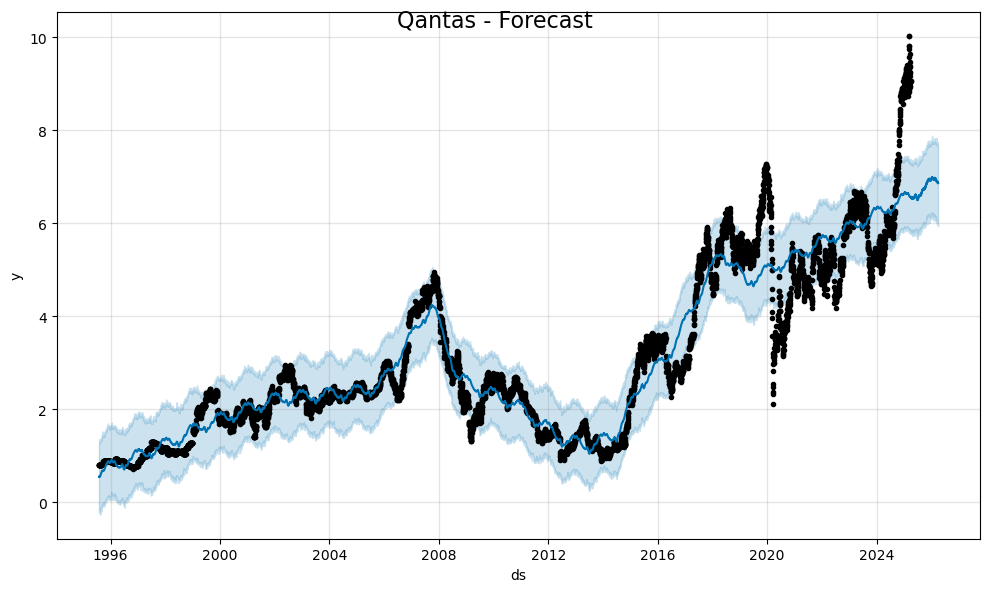

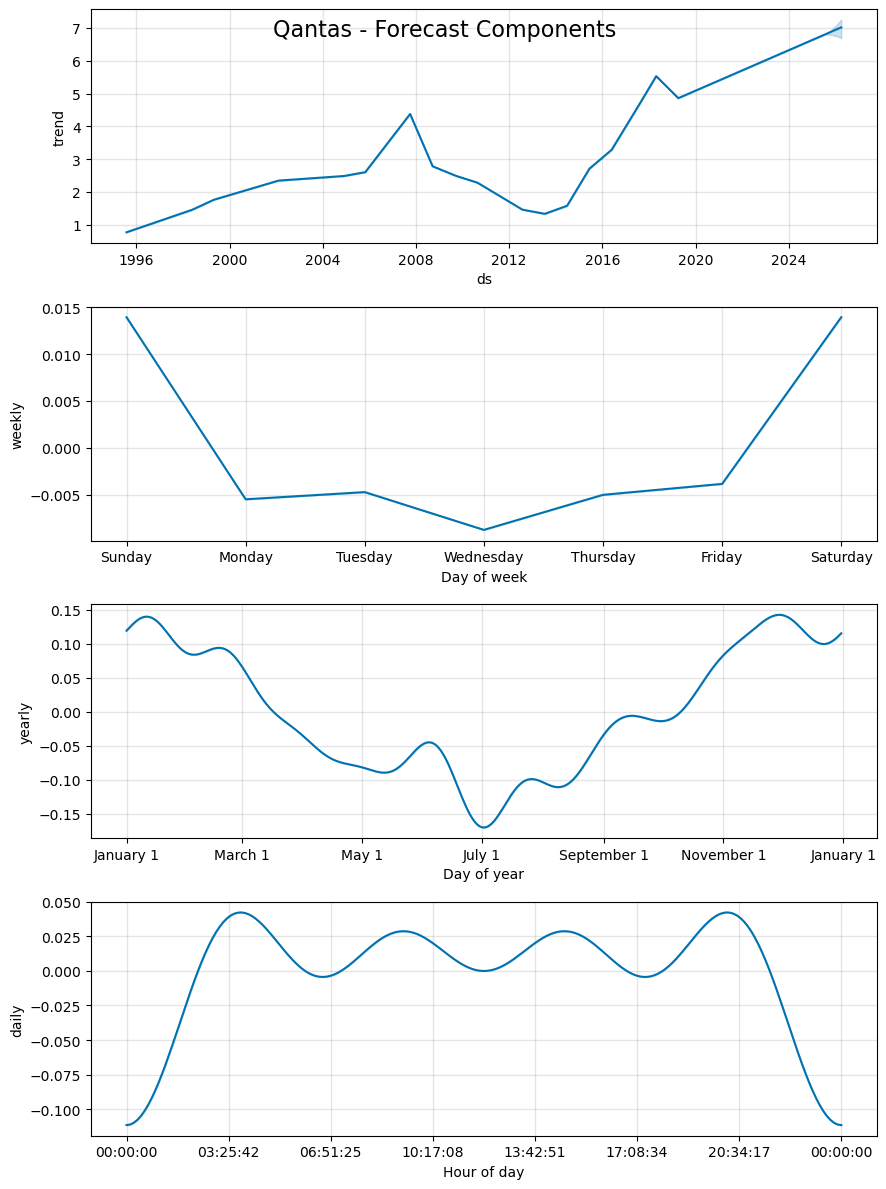

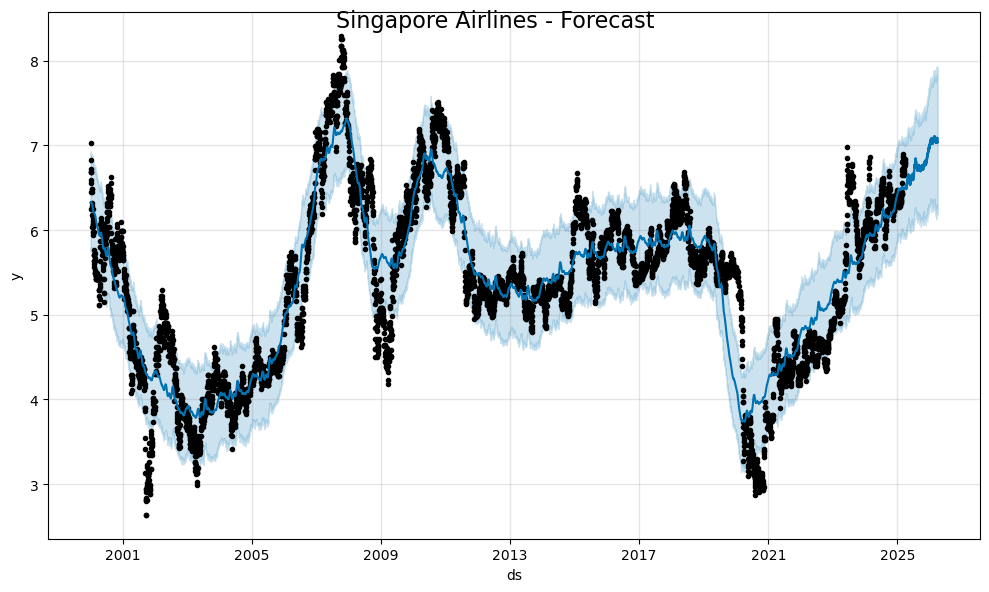

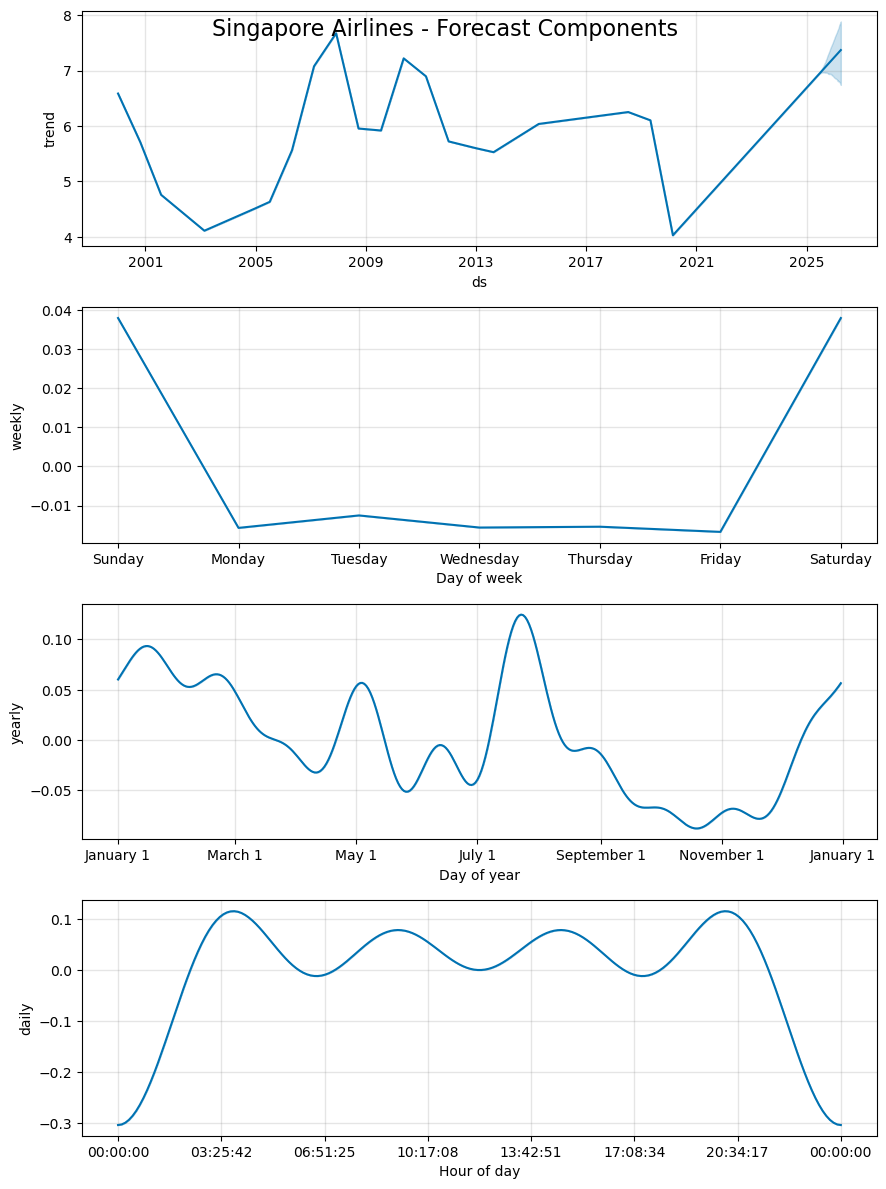

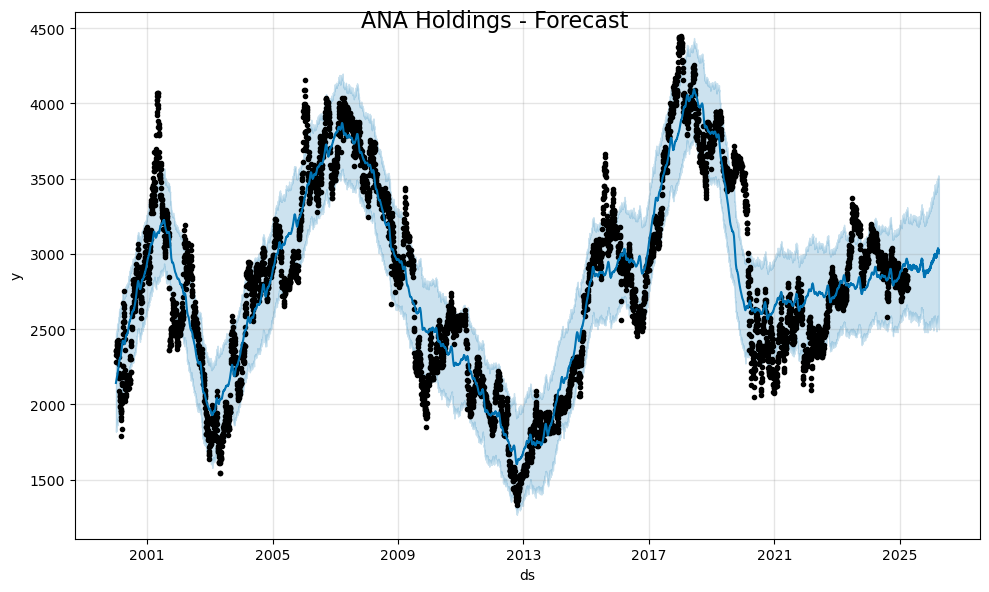

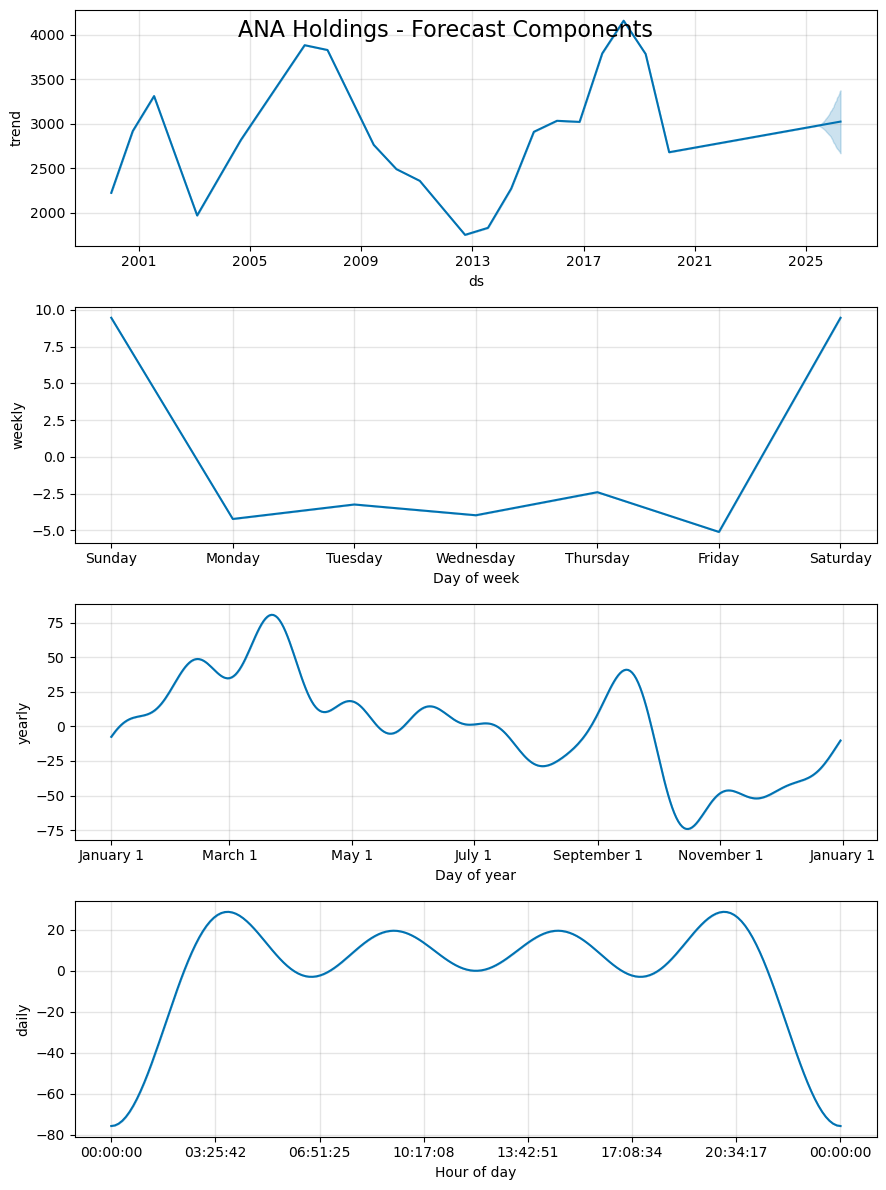

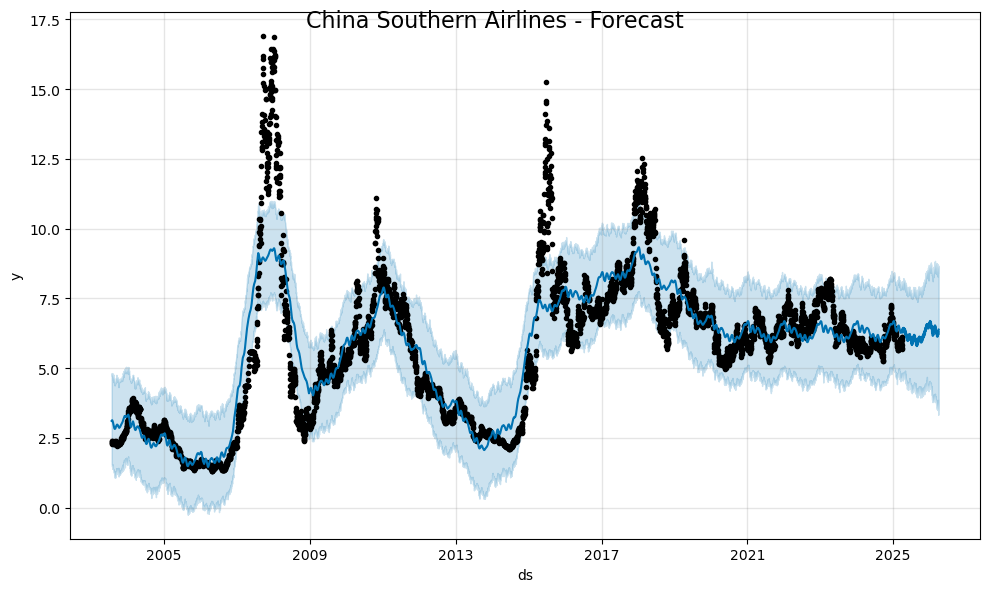

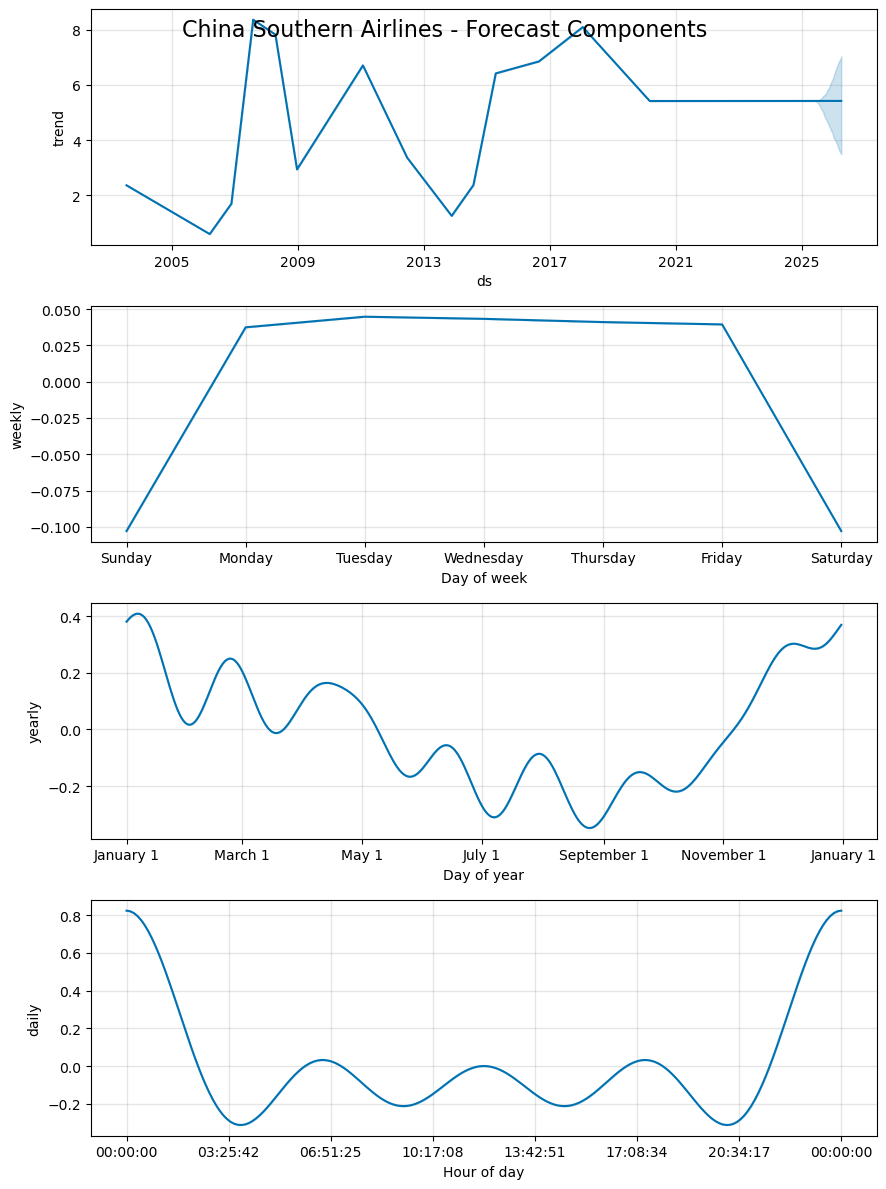

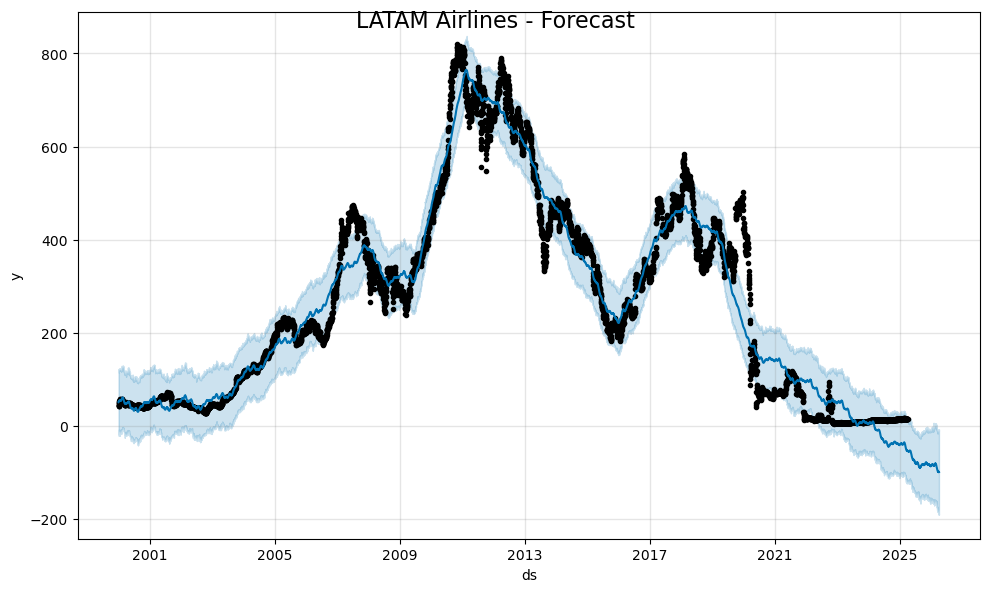

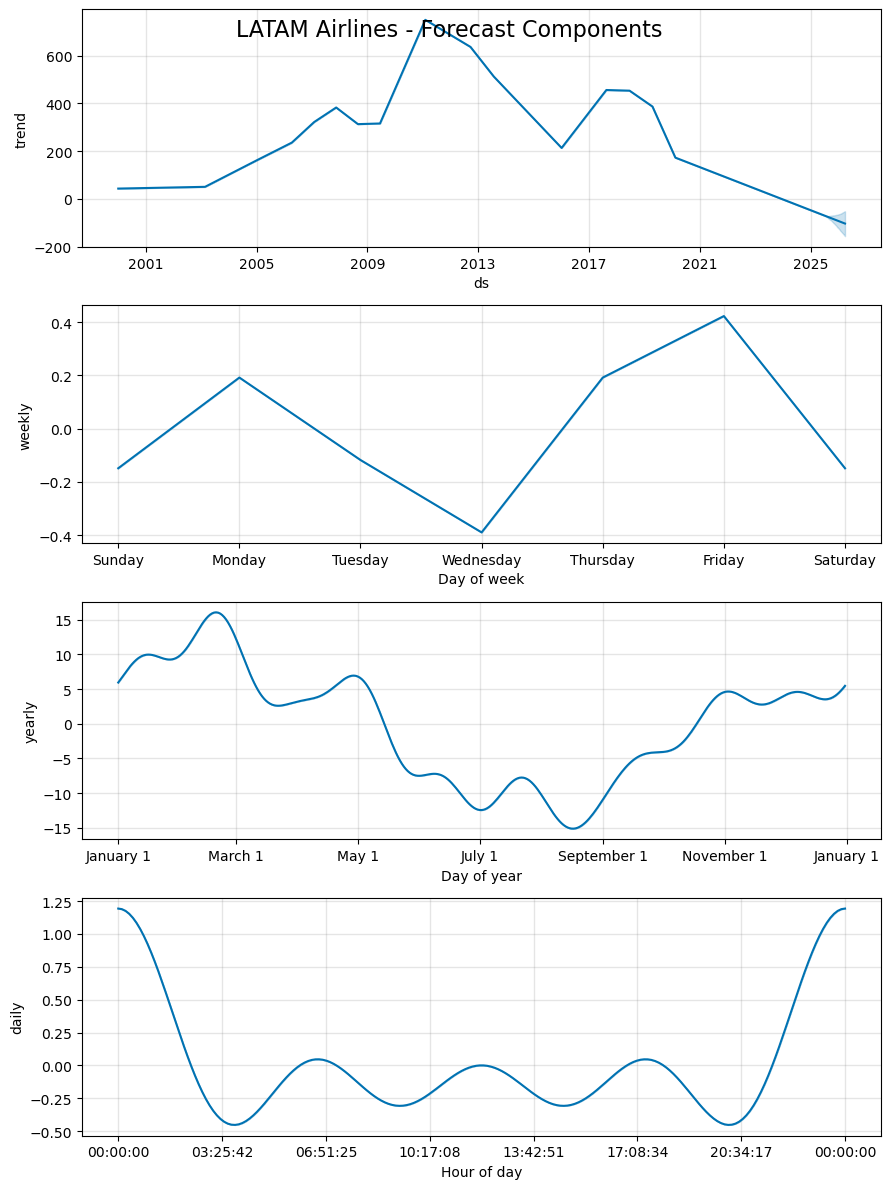

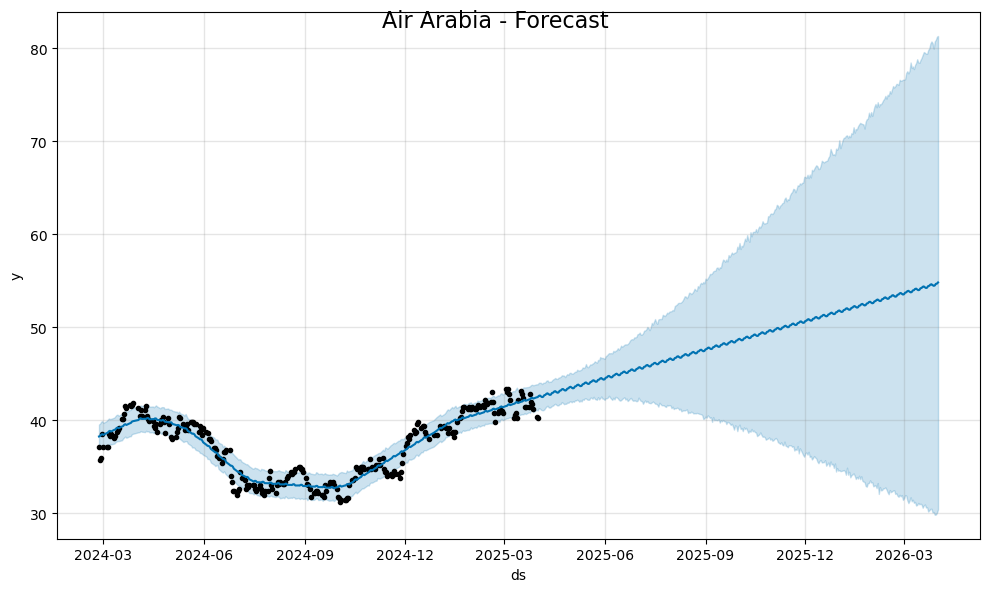

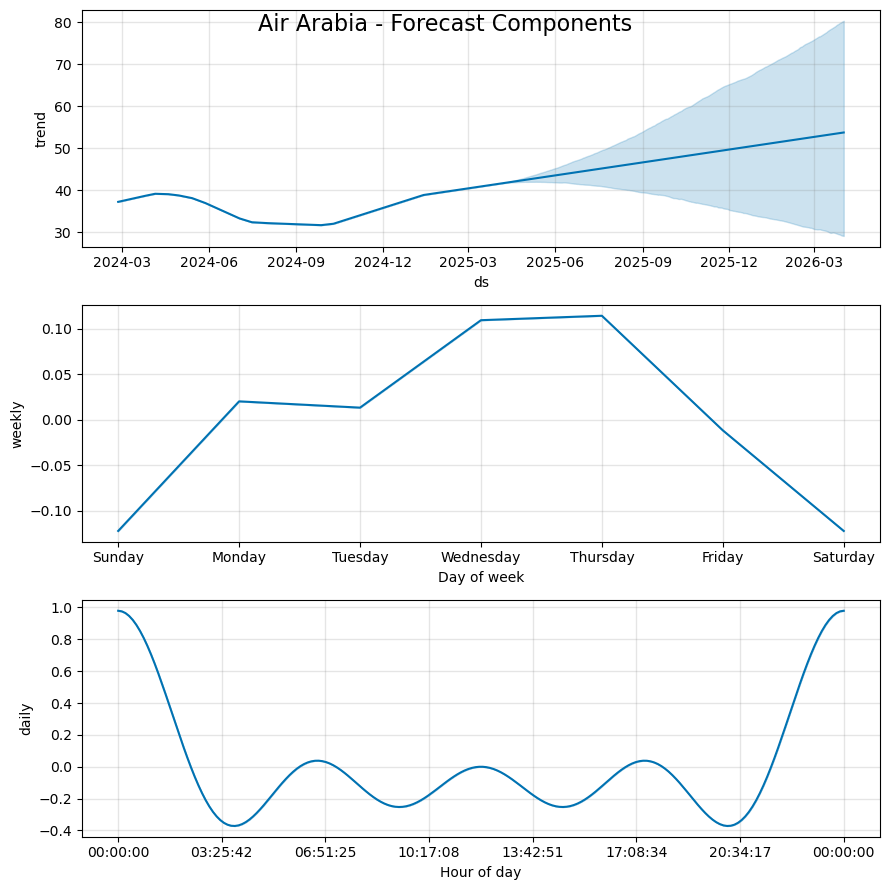

In [42]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Function to predict stock prices
def predict_stock_prices(ticker_symbol, airline_name, forecast_periods=365):
    try:
        # Fetching historical data
        data = yf.Ticker(ticker_symbol)
        history = data.history(period="max")
        
        # Check if data is available
        if history.empty:
            print(f"{airline_name} not available")
            return None, None
        
        # Preparing the data for Prophet
        df = pd.DataFrame({
            'ds': history.index,
            'y': history['Close']
        })
        df['ds'] = df['ds'].dt.tz_localize(None)  # Removing timezone info
        
        # Creating the Prophet model
        model = Prophet(daily_seasonality=True)
        model.fit(df)
        
        # Future predictions
        future = model.make_future_dataframe(periods=forecast_periods)
        forecast = model.predict(future)
        
        # Plotting the forecast with the airline name as the title
        fig_forecast = model.plot(forecast)
        fig_forecast.suptitle(f"{airline_name} - Forecast", fontsize=16)
        
        # Plotting the components with the airline name as the title
        fig_components = model.plot_components(forecast)
        fig_components.suptitle(f"{airline_name} - Forecast Components", fontsize=16)
        
        # Printing the forecast details
        print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
        
        return model, forecast
    except Exception as e:
        print(f"An error occurred for {airline_name}: {e}")
        return None, None

# Dictionary of airlines and their ticker symbols
airlines = {
    "Ryanair": "RYAAY",
    "Qantas": "QAN.AX",
    "Singapore Airlines": "C6L.SI",
    "ANA Holdings": "9202.T",
    "China Southern Airlines": "600029.SS",
    "LATAM Airlines": "LTM.SN",
    "Air Arabia": "AIRA.DU"
}

# Looping through the airlines
for airline, ticker in airlines.items():
    print(f"Processing {airline} ({ticker})...")
    model, forecast = predict_stock_prices(ticker, airline)
    if model is None and forecast is None:
        # Skip to the next airline
        continue
    print(f"Finished processing {airline}.")
